# Gene Expression and Protein Accumulation in Alzheimer's Disease

## Team Member Names & Contributions

- Nina Nguyen: Gene expression data wrangling and analysis
- Victor Magdaleno-Garcia: Protein and pathology data wrangling and analysis
- Thomas Shoff: Writing, statistics, and data visualization

## Abstract

Through use of the Allen Aging, Dementia, and TBI databases for gene expression (RNAseq) and protein accumulation (Protein and Pathology Quantification), we examined the correlation between changes in protein accumulation and gene expression in the hippocampus and the parietal cortex. We found that the parietal cortex showed no significant protein accumulation, while the hippocampus showed changes in protein accumulation between the Alzheimer's and no-dementia states. However, there was no overall correlation between the changes in gene expression (for the chosen genes) and changes in protein accumulation, suggesting a different mechanism behind accumulation of proteins.

# Research Question

To what extent can increased protein accumulation pathology observed in Alzhiemer’s disease be correlated to changes in gene expression in different structures in the brain, specifically between the hippocampus and the parietal cortex?

# Background and Prior Work

### Why Alzheimer's disease?
Alzheimer’s disease (AD) is one of the most prevalent progressive neurodegenerative diseases and is often categorized by increased protein accumulation. The formation of neurofibrillary tangles and protein plaques serves as a hallmark of the disease. Hyperphosphorylation of tau protein, and its increased expression, and accumulation of amyloid beta (Aβ) are key to the pathology of the disease. 

### How can we quantify AD progression?
Through the use of immunohistochemistry and markers of neurofibrillary tangles, the Braak Staging system was developed to determine the order by which areas of the brain are affected by AD. The hippocampus emerges during Stage II of this system, suggesting that it is one of the first locations in the brain that AD manifests in. The hippocampus has a significant impact on memory retention and memory consolidation, which is one of the first systems to sustain damage during AD progression. This pathology was confirmed in studies that confirmed that the majority of protein changes related to AD occurred in the hippocampus and that the hippocampus is one of the first brain regions to develop neurofibrillary lesions. In contrast, the parietal cortex is part of Stage V of the Braak system, meaning that it is impacted by neurofibrillary tangles significantly after the hippocampus.

### Genes? Proteins?
Although protein-related pathology has been consistently observed, the question of mechanism ultimately remains. Gene expression has been cited previously as one of the central causes of AD, but genetic correlation of AD remains strong only in specific populations, particularly those with mutations to amyloid beta metabolism. Although recent genome-wide studies have found increasing specificity on the causes of AD, there is no specific genetic requirement to develop sporadic AD. Therefore, the correlation between upregulation of certain genes and protein accumulation in sporadic AD requires further analysis. In this research project, we attempt to compare gene expression in the hippocampus and the parietal cortex to determine the extent to which increased protein accumulation is correlated to upregulation of certain genes. 

### There's data about this?

To determine which areas to compare, Braak staging was used to determine that the one of the first areas to develop AD pathology is the hippocampus, while an area that showed less pathology relative to the hippocampus is the parietal cortex. Therefore, we compared the gene expression data for certain genes and protein accumulation data in the hippocampus and the parietal cortex. 

The Allen Aging, Dementia, and TBI RNAseq database was used to gather which genes are upregulated in the hippocampus. The dataset contained gene expression values for a large amount of genes, and we chose genes that had postive fold change above 1.5. Fold change refers to the degree of upregulation of gene expression, so we selected genes that are significantly upregulated. The gene expression for this set of genes was obtained for the parietal cortex as well. This provided the ability to compare gene expression in each region of the brain.

For analysis of protein accumulation, the Allen Aging, Dementia, and TBI Protein and Pathology dataset was used to compare the amount of protein per unit of brain matter in the hippocampus and parietal cortex. Protein data was present for a wide group of proteins (tau, amyloid, etc.) for each brain area. This data will allow us to compare protein concentration/accumulation for each region of the brain. 

To further compare Alzheimer's versus no dementia states, the donor information was downloaded from these datasets. The DSM IV Clinical diagnosis of Alzheimer's was used to group the data into two groups: AD and no dementia. Through this, we compared the Alzheimer's vs. non-Alzheimer's states to judge if one had a stronger correlation between the upregulated genes and the protein accumulation in each brain area.


### References (include links):
(1) Karch CM, Cruchaga C, Goate AM. Alzheimer's disease genetics: from the bench to the clinic. Neuron. 2014;83(1):11-26. doi:10.1016/j.neuron.2014.05.041 -- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4120741/ 

(2) McKetney J, Runde RM, Hebert AS, Salamat S, Roy S, Coon JJ. Proteomic Atlas of the Human Brain in Alzheimer's Disease. J Proteome Res. 2019;18(3):1380-1391.doi:10.1021/acs.jproteome.9b00004 -- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6480317/

(3) Braak, Heiko et al. “Staging of Alzheimer disease-associated neurofibrillary pathology using paraffin sections and immunocytochemistry.” Acta neuropathologica vol. 112,4 (2006): 389-404. doi:10.1007/s00401-006-0127-z -- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3906709/

(4) Xu, Jingshu et al. “Regional protein expression in human Alzheimer's brain correlates with disease severity.” Communications biology vol. 2 43. 4 Feb. 2019,doi:10.1038/s42003-018-0254-9 -- https://www.nature.com/articles/s42003-018-0254-9

(5) Blennow, Kaj et al. “Alzheimer's disease.” Lancet (London, England) vol. 368,9533 (2006):387-403. doi:10.1016/S0140-6736(06)69113-7 -- https://pubmed.ncbi.nlm.nih.gov/16876668/

# Hypothesis


We predict that changes in gene exression will be highly correlated to changes in protein-related pathology, specifically in amount of protein per unit of brain matter. Furthermore, this correlation will be stronger in patients with Alzheimer's disease than those with no form of dementia.

# Setup

In [238]:
## Import statements:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
from csv import reader
from statistics import mean
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 15]

# Data Wrangling

### Gene Expression Data Wrangling

For this part, the gene expression data for the hippocampus is imported and organized to create a large joined dataset with the correct indices.

In [3]:
#Import the gene expression data (it is contained in two files after download)
columns_df = pd.read_csv('Columns.csv')
expression_df = pd.read_csv('Expression.csv')

#Transpose the data to make it face vertically so it is easier to view
expression_df_t = expression_df.transpose()

#Drop the gene id information
expression_df_t = expression_df_t.drop(['499307237'])

#Reset the indices to reformat
expression_df_t = expression_df_t.reset_index()

#Rename the expression data columns with the gene names
expression_df_new = expression_df_t.rename({'index': 'RNVU1-7', 0 : 'HSPA6', 1 : 'HSPA1A', 2: 'HSPA1B', 3 : 'SERPINH1', 4 : 'SNORD116-15', 5 : 'RPS28', 6: 'DNAJB1'}, axis = 'columns')

#Join the dataset with the columns to add the donor information
hippo_joined = columns_df.join(expression_df_new)

#Set the index to the donor id
hippo_joined = hippo_joined.set_index('donor_id')
hippo_joined.head()

,donor_name,donor_age,donor_color,sample_well,sample_polygon,sample_mri_0,sample_mri_1,sample_mri_2,structure_id,structure_name,...,top_level_structure_abbreviation,top_level_structure_color,RNVU1-7,HSPA6,HSPA1A,HSPA1B,SERPINH1,SNORD116-15,RPS28,DNAJB1
donor_id,,,,,,,,,,,,,,,,,,,,,
309335438,H14.09.001,NaN,0,320630832,310790374,-1,-1,-1,10294,hippocampus (hippocampal formation),...,NP,D7D8D8,-0.3547,0.5976,0.4744,0.5170,0.5778,1.6377,0.7077,0.4092
309335439,H14.09.002,NaN,0,320630842,310790372,-1,-1,-1,10294,hippocampus (hippocampal formation),...,NP,D7D8D8,1.0326,0.6425,0.3058,0.2996,0.6158,1.5647,0.7636,0.3601
309335440,H14.09.003,NaN,0,320630856,310790368,-1,-1,-1,10294,hippocampus (hippocampal formation),...,NP,D7D8D8,-0.6420,0.6954,0.5502,0.4237,0.7702,0.6945,0.1276,0.4247
309335441,H14.09.004,NaN,0,320630858,310892446,-1,-1,-1,10294,hippocampus (hippocampal formation),...,NP,D7D8D8,-0.1463,0.5143,0.5510,0.4900,0.2932,0.0000,0.9606,0.4877
309335442,H14.09.005,NaN,0,320630973,310790082,-1,-1,-1,10294,hippocampus (hippocampal formation),...,NP,D7D8D8,0.4333,0.6918,0.7774,0.7483,0.7504,0.0000,0.7603,0.7784


Next, the gene expression data for the parietal cortex is imported and organized in the same fashion.

In [4]:
#Import the gene expression data (it is contained in two files after download)
pcx_columns_df = pd.read_csv('pcx_columns.csv')
pcx_expression_df = pd.read_csv('pcx_expression.csv')

#Transpose the data to make it face vertically so it is easier to view
pcx_expr_df_t = pcx_expression_df.transpose()

#Drop the gene id information
pcx_expr_df_t = pcx_expr_df_t.drop(['499307237'])

#Reset the indices to reformat
pcx_expr_df_index = pcx_expr_df_t.reset_index()

#Rename the expression data columns with the gene names
pcx_expr_df_new = pcx_expr_df_index.rename({'index': 'RNVU1-7', 0 : 'HSPA6', 1 : 'HSPA1A', 2: 'HSPA1B', 3 : 'SERPINH1', 4 : 'SNORD116-15', 5 : 'RPS28', 6: 'DNAJB1'}, axis = 'columns')

#Join the dataset with the columns to add the donor information
pcx_joined = pcx_columns_df.join(pcx_expr_df_new)

#Set the index to the donor id
pcx_joined = pcx_joined.set_index('donor_id')
pcx_joined.head()

,donor_name,donor_age,donor_color,sample_well,sample_polygon,sample_mri_0,sample_mri_1,sample_mri_2,structure_id,structure_name,...,top_level_structure_abbreviation,top_level_structure_color,RNVU1-7,HSPA6,HSPA1A,HSPA1B,SERPINH1,SNORD116-15,RPS28,DNAJB1
donor_id,,,,,,,,,,,,,,,,,,,,,
309335438,H14.09.001,NaN,0,320630836,310790570,-1,-1,-1,10208,parietal neocortex,...,NP,D7D8D8,0.3178,0.3938,0.3529,0.3564,0.3348,2.0702,0.6105,0.3696
309335439,H14.09.002,NaN,0,320630846,310790558,-1,-1,-1,10208,parietal neocortex,...,NP,D7D8D8,0.9366,0.1421,0.2048,0.1406,0.0995,1.6913,0.4317,0.2060
309335441,H14.09.004,NaN,0,320630864,310967164,-1,-1,-1,10208,parietal neocortex,...,NP,D7D8D8,-1.4981,-0.0562,0.1160,-0.0252,-0.3776,1.4774,0.9489,0.0970
309335443,H14.09.006,NaN,0,320630981,310790540,-1,-1,-1,10208,parietal neocortex,...,NP,D7D8D8,0.0007,0.7113,0.6346,0.5812,0.7468,0.0000,0.0000,0.7160
309335444,H14.09.007,NaN,0,320630953,310971281,-1,-1,-1,10208,parietal neocortex,...,NP,D7D8D8,-0.9077,0.0302,0.2944,0.2254,0.1169,0.0000,0.0000,0.2309


Now, the information regarding the donors is imported and filtered to create two dataframes: one with only Alzhiemer's Disease cases and one with No Dementia cases.

In [5]:
#Import donor information
donor_df = pd.read_csv('DonorInformation.csv')

#Remove all diagnoses other than non-dementia or AD
donor_df = donor_df[donor_df.dsm_iv_clinical_diagnosis != 'Vascular']
donor_df = donor_df[donor_df.dsm_iv_clinical_diagnosis != 'Multiple Etiologies']
donor_df = donor_df[donor_df.dsm_iv_clinical_diagnosis != 'Other or Unknown Cause']
donor_df = donor_df[donor_df.dsm_iv_clinical_diagnosis != 'Other Medical']

#Create each individual dataframe
ad_df = donor_df[donor_df.dsm_iv_clinical_diagnosis != 'No Dementia']
no_dementia_df = donor_df[donor_df.dsm_iv_clinical_diagnosis != "Alzheimer's Disease Type"]

#Set index to donor id and sort the dataframes
ad_df = ad_df.set_index('donor_id')
ad_df = ad_df.sort_values(by = 'donor_id')

no_dementia_df = no_dementia_df.set_index('donor_id')
no_dementia_df = no_dementia_df.sort_values(by = 'donor_id')

ad_df.head()

,name,age,sex,apo_e4_allele,education_years,age_at_first_tbi,longest_loc_duration,cerad,num_tbi_w_loc,dsm_iv_clinical_diagnosis,control_set,nincds_arda_diagnosis,ever_tbi_w_loc,race,hispanic,act_demented,braak,nia_reagan
donor_id,,,,,,,,,,,,,,,,,,
309335439,H14.09.002,90-94,M,Y,16,0,Unknown or N/A,0,0,Alzheimer's Disease Type,2,Probable Alzheimer'S Disease,N,White,Not Hispanic,Dementia,1,1
309335446,H14.09.009,100+,M,N,15,10,> 1 hr,3,2,Alzheimer's Disease Type,28,Probable Alzheimer'S Disease,Y,White,Not Hispanic,Dementia,5,3
309335447,H14.09.010,100+,M,Y,16,0,Unknown or N/A,3,0,Alzheimer's Disease Type,28,Possible Alzheimer'S Disease,N,White,Not Hispanic,Dementia,4,2
309335455,H14.09.018,79,M,N,18,0,Unknown or N/A,0,0,Alzheimer's Disease Type,44,Probable Alzheimer'S Disease,N,White,Not Hispanic,Dementia,2,0
309335458,H14.09.021,88,M,N,12,18,> 1 hr,0,1,Alzheimer's Disease Type,21,Probable Alzheimer'S Disease,Y,White,Not Hispanic,Dementia,1,1


In [6]:
no_dementia_df.head()

,name,age,sex,apo_e4_allele,education_years,age_at_first_tbi,longest_loc_duration,cerad,num_tbi_w_loc,dsm_iv_clinical_diagnosis,control_set,nincds_arda_diagnosis,ever_tbi_w_loc,race,hispanic,act_demented,braak,nia_reagan
donor_id,,,,,,,,,,,,,,,,,,
309335438,H14.09.001,90-94,M,N,16,15,> 1 hr,0,2,No Dementia,2,No Dementia,Y,White,Not Hispanic,No Dementia,6,2
309335440,H14.09.003,90-94,M,N,13,11,10 min - 1 hr,2,2,No Dementia,14,No Dementia,Y,White,Not Hispanic,No Dementia,1,2
309335441,H14.09.004,90-94,M,N,14,0,Unknown or N/A,1,0,No Dementia,14,No Dementia,N,White,Not Hispanic,No Dementia,3,1
309335443,H14.09.006,90-94,F,N,14,0,Unknown or N/A,0,0,No Dementia,16,No Dementia,N,White,Not Hispanic,No Dementia,3,1
309335448,H14.09.011,86,F,N,10,9,> 1 hr,1,1,No Dementia,32,No Dementia,Y,White,Not Hispanic,No Dementia,4,1


Now, all of the individual dataframes are joined to create frames that contain gene expression for a specific region in Alzheimer's and no dementia patients.

In [7]:
# Combine information for PCx and AD donor info
pcx_ad = ad_df.join(pcx_joined)
pcx_ad.head()

,name,age,sex,apo_e4_allele,education_years,age_at_first_tbi,longest_loc_duration,cerad,num_tbi_w_loc,dsm_iv_clinical_diagnosis,...,top_level_structure_abbreviation,top_level_structure_color,RNVU1-7,HSPA6,HSPA1A,HSPA1B,SERPINH1,SNORD116-15,RPS28,DNAJB1
donor_id,,,,,,,,,,,,,,,,,,,,,
309335439,H14.09.002,90-94,M,Y,16,0,Unknown or N/A,0,0,Alzheimer's Disease Type,...,NP,D7D8D8,0.9366,0.1421,0.2048,0.1406,0.0995,1.6913,0.4317,0.2060
309335446,H14.09.009,100+,M,N,15,10,> 1 hr,3,2,Alzheimer's Disease Type,...,NP,D7D8D8,0.1104,2.0803,1.0692,1.1054,1.3048,1.3108,0.0000,1.6383
309335447,H14.09.010,100+,M,Y,16,0,Unknown or N/A,3,0,Alzheimer's Disease Type,...,NP,D7D8D8,0.0000,0.0000,0.4521,0.2682,0.0124,0.0000,0.0000,-0.0012
309335455,H14.09.018,79,M,N,18,0,Unknown or N/A,0,0,Alzheimer's Disease Type,...,NP,D7D8D8,0.0090,0.0000,0.0711,-0.1225,0.1547,0.0000,0.0000,-1.0923
309335458,H14.09.021,88,M,N,12,18,> 1 hr,0,1,Alzheimer's Disease Type,...,NP,D7D8D8,0.4530,-0.0548,0.1112,0.0069,-0.0997,0.5017,0.0000,0.1595


In [227]:
# Combine information for PCx and No Dementia donor info
pcx_noD = no_dementia_df.join(pcx_joined)
pcx_noD.head()

,name,age,sex,apo_e4_allele,education_years,age_at_first_tbi,longest_loc_duration,cerad,num_tbi_w_loc,dsm_iv_clinical_diagnosis,...,top_level_structure_abbreviation,top_level_structure_color,RNVU1-7,HSPA6,HSPA1A,HSPA1B,SERPINH1,SNORD116-15,RPS28,DNAJB1
donor_id,,,,,,,,,,,,,,,,,,,,,
309335438,H14.09.001,90-94,M,N,16,15,> 1 hr,0,2,No Dementia,...,NP,D7D8D8,0.3178,0.3938,0.3529,0.3564,0.3348,2.0702,0.6105,0.3696
309335440,H14.09.003,90-94,M,N,13,11,10 min - 1 hr,2,2,No Dementia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309335441,H14.09.004,90-94,M,N,14,0,Unknown or N/A,1,0,No Dementia,...,NP,D7D8D8,-1.4981,-0.0562,0.1160,-0.0252,-0.3776,1.4774,0.9489,0.0970
309335443,H14.09.006,90-94,F,N,14,0,Unknown or N/A,0,0,No Dementia,...,NP,D7D8D8,0.0007,0.7113,0.6346,0.5812,0.7468,0.0000,0.0000,0.7160
309335448,H14.09.011,86,F,N,10,9,> 1 hr,1,1,No Dementia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Combine information for HIP and AD donor info
hippo_ad = ad_df.join(hippo_joined)
hippo_ad.head()

,name,age,sex,apo_e4_allele,education_years,age_at_first_tbi,longest_loc_duration,cerad,num_tbi_w_loc,dsm_iv_clinical_diagnosis,...,top_level_structure_abbreviation,top_level_structure_color,RNVU1-7,HSPA6,HSPA1A,HSPA1B,SERPINH1,SNORD116-15,RPS28,DNAJB1
donor_id,,,,,,,,,,,,,,,,,,,,,
309335439,H14.09.002,90-94,M,Y,16,0,Unknown or N/A,0,0,Alzheimer's Disease Type,...,NP,D7D8D8,1.0326,0.6425,0.3058,0.2996,0.6158,1.5647,0.7636,0.3601
309335446,H14.09.009,100+,M,N,15,10,> 1 hr,3,2,Alzheimer's Disease Type,...,NP,D7D8D8,0.2208,0.8972,0.8966,0.9110,1.0491,1.1600,0.0000,0.7559
309335447,H14.09.010,100+,M,Y,16,0,Unknown or N/A,3,0,Alzheimer's Disease Type,...,NP,D7D8D8,0.3926,0.0000,0.7382,0.6602,0.0000,-0.3806,0.0000,0.3081
309335455,H14.09.018,79,M,N,18,0,Unknown or N/A,0,0,Alzheimer's Disease Type,...,NP,D7D8D8,0.4907,1.1030,0.6278,0.5198,1.0853,0.0000,0.0000,0.9587
309335458,H14.09.021,88,M,N,12,18,> 1 hr,0,1,Alzheimer's Disease Type,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Combine information for HIP and No Dementia donor info
hippo_noD = no_dementia_df.join(hippo_joined)
hippo_noD.head()

,name,age,sex,apo_e4_allele,education_years,age_at_first_tbi,longest_loc_duration,cerad,num_tbi_w_loc,dsm_iv_clinical_diagnosis,...,top_level_structure_abbreviation,top_level_structure_color,RNVU1-7,HSPA6,HSPA1A,HSPA1B,SERPINH1,SNORD116-15,RPS28,DNAJB1
donor_id,,,,,,,,,,,,,,,,,,,,,
309335438,H14.09.001,90-94,M,N,16,15,> 1 hr,0,2,No Dementia,...,NP,D7D8D8,-0.3547,0.5976,0.4744,0.5170,0.5778,1.6377,0.7077,0.4092
309335440,H14.09.003,90-94,M,N,13,11,10 min - 1 hr,2,2,No Dementia,...,NP,D7D8D8,-0.6420,0.6954,0.5502,0.4237,0.7702,0.6945,0.1276,0.4247
309335441,H14.09.004,90-94,M,N,14,0,Unknown or N/A,1,0,No Dementia,...,NP,D7D8D8,-0.1463,0.5143,0.5510,0.4900,0.2932,0.0000,0.9606,0.4877
309335443,H14.09.006,90-94,F,N,14,0,Unknown or N/A,0,0,No Dementia,...,NP,D7D8D8,0.4526,0.6975,0.6922,0.6544,0.8148,0.0000,0.0000,0.6138
309335448,H14.09.011,86,F,N,10,9,> 1 hr,1,1,No Dementia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Protein and Pathology Data Wrangling

In [141]:
opened_file = open('DonorInformation.csv')
read_file = reader(opened_file, delimiter = ',')
donor_data = list(read_file)

In [142]:
# create a dataframe with all donor information 
donor_df = pd.DataFrame(donor_data)

# The first row of the dataframe contains the names of the columns 
# Assign the first row of the of the dataframe to be the columns 
# Assign the donor_id as the index of the dataframe 
donor_columns = donor_df.loc[0]
donor_df.columns = donor_columns
donor_df = donor_df.set_index('donor_id')

# drop the 'donor_id' column from the dataframe
donor_df = donor_df.drop('donor_id')

# assess the freguency of diagnosis within the avaialave donors 
donor_df['dsm_iv_clinical_diagnosis'].value_counts()

No Dementia                 56
Alzheimer's Disease Type    30
Multiple Etiologies         12
Vascular                     4
Other Medical                3
Other or Unknown Cause       2
Name: dsm_iv_clinical_diagnosis, dtype: int64

In [143]:
# create a list of indeces from the donors that are catagorized as having 'No Dementia'
no_dementia = list(donor_df[donor_df['dsm_iv_clinical_diagnosis'] == 'No Dementia'].index)
print(no_dementia)

['326765665', '326765656', '467056391', '309335457', '326765681', '326765657', '309335443', '326765661', '326765659', '309335452', '309335488', '309335475', '326765664', '309335469', '309335441', '309335440', '309335461', '326765682', '309335497', '309335495', '309335465', '309335438', '326765649', '309335467', '309335494', '326765688', '467056407', '326765652', '326765683', '326765666', '309335448', '309335489', '309335460', '309335474', '326765671', '309335456', '309335482', '326765689', '309335476', '309335451', '309335490', '309335487', '326765677', '309335483', '467056397', '309335478', '326765667', '326765672', '326765668', '467056405', '326765684', '326765663', '309335464', '309335453', '309335454', '309335486']


In [144]:
# create a list of indeces from the donors that are catagorized as having Alzheimer's
AD = list(donor_df[donor_df['dsm_iv_clinical_diagnosis'] == "Alzheimer's Disease Type" ].index)
print(AD)

['309335447', '467056408', '467056406', '467056409', '309335492', '309335479', '309335484', '309335491', '326765658', '326765669', '326765685', '309335481', '326765675', '309335439', '326765686', '309335459', '309335446', '326765673', '326765674', '326765660', '309335471', '309335455', '309335493', '309335470', '326765655', '309335477', '326765678', '326765662', '309335458', '309335462']


In [145]:
opened_file = open('ProteinAndPathologyQuantifications.csv')
read_file = reader(opened_file, delimiter = ',')
pp_data = list(read_file)

In [146]:
# Create a Dataframe from the Protein and Pathology csv file 
# Assign the donor_id as the index of the dataframe 
# The first row of the dataframe contains the names of the columns 
# Assign the first row of the of the dataframe to be the columns 
pp_df = pd.DataFrame(pp_data)
pp_columns = pp_df.loc[0]
pp_df.columns = pp_columns
pp_df = pp_df.set_index('donor_id')

# Remove the column 'donor_id' from the dataframe 
pp_df = pp_df.drop('donor_id')
pp_df.head()

,donor_name,structure_id,structure_acronym,ihc_a_syn,ihc_tau2_ffpe,ihc_at8_ffpe,ihc_at8,ihc_ptdp_43_ffpe,ihc_a_beta_ffpe,ihc_a_beta,...,il_4_pg_per_mg,rantes_pg_per_mg,ab40_pg_per_mg,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg
donor_id,,,,,,,,,,,,,,,,,,,,,
309335467,H14.09.030,10557,FWM,7.79282730378192e-05,0.00235802722424796,0.00113707656679261,0.0001099126132854,0.00125855120188754,0.00833536326954515,0.00459583652656213,...,2.68,15.99,0.7361,0.122288,1.47,20.78,5.03736,9.38,11.78,523.292251
309335480,H14.09.043,10208,PCx,6.28024529340296e-05,0.00276219563153047,0.0012718130838249,0.000164056638335747,0.00235399990658703,0.00504677619576175,0.00810806414234886,...,3.02,24.04,0.66909375,0.111962,1.44,40.4,4.95462,8.1,45.02,81.493875
309335493,H14.09.056,10557,FWM,6.41346519136313e-05,0.00346832365683119,0.0137873651291863,0.0160231121005929,0.00170813151482435,0.00736531175381873,0.0172135593846083,...,0.8,129.8,0.7361,0.091084,0.54,46.88,5.88409,27,15.82,470.734514
326765668,H14.09.081,10557,FWM,4.91181383864579e-05,0.00303519184621465,0.00170718518810115,0.000136874610334724,0.00172899420241785,0.00404564958895351,0.00386809200960142,...,1.3,15.16,8.995575,0.054076,0.76,10.34,16.13524,8.06,24.22,568.368571
326765668,H14.09.081,10235,TCx,7.95570944048711e-05,0.00208759345440509,0.00448934613712671,6.16616142621183e-05,0.00151296100107045,0.0158088471432355,0.0462438154901585,...,0,17.9,95.931,0.03,1.22,21.38,0.03,10.52,23.72,438.8632625


In [147]:
# create a dataframe only from entries taken from the hippocampus 
hippo_df = pp_df[pp_df['structure_acronym'] == 'HIP']

# organize the columns of the hippocampus df into a list 
hippo_columns = list(hippo_df.columns)

#seperate out the columns that only have to do with protein quantifications 
hippo_columns_proteins = hippo_columns[12:]

#create a df with only the protein quantification columns for hippocampus 
hippo_proteins = hippo_df[hippo_columns_proteins]
hippo_proteins.head()

,ptau_ng_per_mg,vegf_pg_per_mg,ab42_over_ab40_ratio,tnf_a_pg_per_mg,tau_ng_per_mg,il_10_pg_per_mg,isoprostane_pg_per_mg,il_6_pg_per_mg,il_1b_pg_per_mg,ptau_over_tau_ratio,il_4_pg_per_mg,rantes_pg_per_mg,ab40_pg_per_mg,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg
donor_id,,,,,,,,,,,,,,,,,,,,
326765676,,,,,,,,,,,,,,,,,,,,
467056409,2.774843606,0.18,225.547607,13.41,1.3832594,2.54,,60.7,0.1,2.00601825,0,16.19,0.5126625,0.3162305,0,0,5.9453,49.67,0,115.6298
326765683,2.796675263,0.5,350.160648,8.64,1.367140744,1.36,,17.1,0.2,2.04563815,0,7.58,0.852175,0.5823165,0.5,3.36,4.60739,17.98,0.04,298.39815
326765670,0.913975525,0.28,427.760421,12.04,1.576830419,2.5,,57.78,0,0.57962829,0,12.78,0.82345,2.556488,0,1.28,3.89588,23.86,0.16,352.2393188
326765667,2.094474375,0.5,0.20572824,16.24,1.423539275,0.2,,49.94,0.26,1.47131478,0,11.78,0.5939875,0.1697915,0,6.2,6.04719,24.72,0.24,0.1222


In [300]:
# Create a Dataframe from the hippocampus dataframe that only includes donors that are diagnosed with AD 
hippo_AD = hippo_proteins.loc[['309335447','467056408','467056406','467056409','309335492','309335479',
                                '309335484','309335491','326765658','326765669','326765685','309335481',
                                '326765675','309335439','326765686','309335459','309335446','326765673',
                                '326765674','326765660','309335471','309335455','309335493','309335470',
                                '326765655','309335477','326765678','326765662','309335458','309335462']]
hippo_AD.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


,ptau_ng_per_mg,vegf_pg_per_mg,ab42_over_ab40_ratio,tnf_a_pg_per_mg,tau_ng_per_mg,il_10_pg_per_mg,isoprostane_pg_per_mg,il_6_pg_per_mg,il_1b_pg_per_mg,ptau_over_tau_ratio,il_4_pg_per_mg,rantes_pg_per_mg,ab40_pg_per_mg,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg
donor_id,,,,,,,,,,,,,,,,,,,,
309335447,2.243292375,0,205.671818,8.7,1.347625981,0.38,,20.84,0.1,1.66462535,0,6.72,2.12565,0.2136455,0,1.28,4.03619,11.14,0.16,437.1863
467056408,0.938087063,2.24,1.05497038,14.88,1.7864841,4.61,,119.22,0.58,0.52510239,0,24.38,0.1519,0.1472195,3.24,0.02,3.113225,44.83,2.5,0.16025
467056406,5.981239125,1.28,7.63810923,25.3,1.1475068,5.86,,121.84,0.86,5.21237794,0,14.19,61.52899375,0.1174685,0.67,0,3.43097,71.14,4.89,469.965175
467056409,2.774843606,0.18,225.547607,13.41,1.3832594,2.54,,60.7,0.1,2.00601825,0,16.19,0.5126625,0.3162305,0,0,5.9453,49.67,0,115.6298
309335492,4.646900138,0,94.1046379,15.92,1.246207719,1.94,,55.92,0,3.72883274,0,12.22,0.909625,0.843098,0,1.54,13.01219,13.36,0.16,85.59993125


In [301]:
# Create a Dataframe from the hippocampus dataframe that only includes donors that have no dementia
hippo_no_dementia = hippo_proteins.loc[['326765665','326765656','467056391','309335457',
                                        '326765681','326765657','309335443','326765661',
                                        '326765659','309335452','309335488','309335475',
                                        '326765664','309335469','309335441','309335440',
                                        '309335461','326765682','309335497','309335495',
                                        '309335465','309335438','326765649','309335467',
                                        '309335494','326765688','467056407','326765652',
                                        '326765683','326765666','309335448','309335489',
                                        '309335460','309335474','326765671','309335456',
                                        '309335482','326765689','309335476','309335451',
                                        '309335490','309335487','326765677','309335483',
                                        '467056397','309335478','326765667','326765672',
                                        '326765668','467056405','326765684','326765663',
                                        '309335464','309335453','309335454','309335486']]
hippo_no_dementia.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  from ipykernel import kernelapp as app


,ptau_ng_per_mg,vegf_pg_per_mg,ab42_over_ab40_ratio,tnf_a_pg_per_mg,tau_ng_per_mg,il_10_pg_per_mg,isoprostane_pg_per_mg,il_6_pg_per_mg,il_1b_pg_per_mg,ptau_over_tau_ratio,il_4_pg_per_mg,rantes_pg_per_mg,ab40_pg_per_mg,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg
donor_id,,,,,,,,,,,,,,,,,,,,
326765665,0.746921838,0,0.18277908,8.1,1.281789775,0,,74.04,0.24,0.58271789,0,12.78,0.545775,0.2966665,1.94,0.58,4.03619,3.7,0.6,0.09975625
326765656,4.712879325,0.76,342.148288,13.08,1.405919544,0.66,,22.88,0.28,3.35216858,0,10.14,1.350075,0.4670255,0,2.5,4.79779,39.32,0.3,461.92585
467056391,2.54075625,1.36,1.52564947,28.05,1.483437,0.78,,164.21,0,1.71274968,0,17.16,0.2468375,0.0750575,0.67,5.15,37.540205,21.59,0,0.3765875
309335457,2.283001875,0.26,442.611716,20.44,1.12330825,1.14,,118.2,0,2.03239126,0,13.84,0.9055875,0.957504,0.76,0.76,14.31406,12.76,1.38,400.8236375
326765681,1.0484775,0.18,163.082157,17.88,1.3628397,38.82,,18.82,0.32,0.76933296,0,7.92,0.759525,0.3510415,1.34,6.8,4.8042,70.12,0.58,123.864975


In [150]:
# create a function that will seperate the empty values from a column
def rem_empty_val(dataframe):
    
    some_list = []
    
    for val in dataframe:
        if val == '':
            continue
        else:
            #print(val)
            val = float(val)
            some_list.append(val)
    return some_list

In [302]:
# create variables that contain all available values of protein quantification from the hippocampus AD dataset 
ptau_ng_per_mg_hippo_AD = rem_empty_val(hippo_AD['ptau_ng_per_mg'].dropna())
vegf_pg_per_mg_hippo_AD = rem_empty_val(hippo_AD['vegf_pg_per_mg'].dropna())
tnf_a_pg_per_mg_hippo_AD = rem_empty_val(hippo_AD['tnf_a_pg_per_mg'].dropna())
tau_ng_per_mg_hippo_AD = rem_empty_val(hippo_AD['tau_ng_per_mg'].dropna())
il_10_pg_per_mg_hippo_AD = rem_empty_val(hippo_AD['il_10_pg_per_mg'].dropna())
isoprostane_pg_per_mg_hippo_AD = rem_empty_val(hippo_AD['isoprostane_pg_per_mg'].dropna())
il_6_pg_per_mg_hippo_AD = rem_empty_val(hippo_AD['il_6_pg_per_mg'].dropna())
il_1b_pg_per_mg_hippo_AD = rem_empty_val(hippo_AD['il_1b_pg_per_mg'].dropna())
il_4_pg_per_mg_hippo_AD = rem_empty_val(hippo_AD['il_4_pg_per_mg'].dropna())
rantes_pg_per_mg_hippo_AD = rem_empty_val(hippo_AD['rantes_pg_per_mg'].dropna())
ab40_pg_per_mg_hippo_AD = rem_empty_val(hippo_AD['ab40_pg_per_mg'].dropna())
a_syn_pg_per_mg_hippo_AD = rem_empty_val(hippo_AD['a_syn_pg_per_mg'].dropna())
ifn_g_pg_per_mg_hippo_AD = rem_empty_val(hippo_AD['ifn_g_pg_per_mg'].dropna())
mcp_1_pg_per_mg_hippo_AD = rem_empty_val(hippo_AD['mcp_1_pg_per_mg'].dropna())
bdnf_pg_per_mg_hippo_AD = rem_empty_val(hippo_AD['bdnf_pg_per_mg'].dropna())
mip_1a_pg_per_mg_hippo_AD = rem_empty_val(hippo_AD['mip_1a_pg_per_mg'].dropna())
il_7_pg_per_mg_hippo_AD = rem_empty_val(hippo_AD['il_7_pg_per_mg'].dropna())
ab42_pg_per_mg_hippo_AD = rem_empty_val(hippo_AD['ab42_pg_per_mg'].dropna())

In [303]:
# create variables that contain all available values of protein quantification from the hippocampus no dementia dataset 
ptau_ng_per_mg_hippo_noD = rem_empty_val(hippo_no_dementia['ptau_ng_per_mg'].dropna())
vegf_pg_per_mg_hippo_noD = rem_empty_val(hippo_no_dementia['vegf_pg_per_mg'].dropna())
tnf_a_pg_per_mg_hippo_noD = rem_empty_val(hippo_no_dementia['tnf_a_pg_per_mg'].dropna())
tau_ng_per_mg_hippo_noD = rem_empty_val(hippo_no_dementia['tau_ng_per_mg'].dropna())
il_10_pg_per_mg_hippo_noD = rem_empty_val(hippo_no_dementia['il_10_pg_per_mg'].dropna())
isoprostane_pg_per_mg_hippo_noD = rem_empty_val(hippo_no_dementia['isoprostane_pg_per_mg'].dropna())
il_6_pg_per_mg_hippo_noD = rem_empty_val(hippo_no_dementia['il_6_pg_per_mg'].dropna())
il_1b_pg_per_mg_hippo_noD = rem_empty_val(hippo_no_dementia['il_1b_pg_per_mg'].dropna())
il_4_pg_per_mg_hippo_noD = rem_empty_val(hippo_no_dementia['il_4_pg_per_mg'].dropna())
rantes_pg_per_mg_hippo_noD = rem_empty_val(hippo_no_dementia['rantes_pg_per_mg'].dropna())
ab40_pg_per_mg_hippo_noD = rem_empty_val(hippo_no_dementia['ab40_pg_per_mg'].dropna())
a_syn_pg_per_mg_hippo_noD = rem_empty_val(hippo_no_dementia['a_syn_pg_per_mg'].dropna())
ifn_g_pg_per_mg_hippo_noD = rem_empty_val(hippo_no_dementia['ifn_g_pg_per_mg'].dropna())
mcp_1_pg_per_mg_hippo_noD = rem_empty_val(hippo_no_dementia['mcp_1_pg_per_mg'].dropna())
bdnf_pg_per_mg_hippo_noD = rem_empty_val(hippo_no_dementia['bdnf_pg_per_mg'].dropna())
mip_1a_pg_per_mg_hippo_noD = rem_empty_val(hippo_no_dementia['mip_1a_pg_per_mg'].dropna())
il_7_pg_per_mg_hippo_noD = rem_empty_val(hippo_no_dementia['il_7_pg_per_mg'].dropna())
ab42_pg_per_mg_hippo_noD = rem_empty_val(hippo_no_dementia['ab42_pg_per_mg'].dropna())

In [153]:
# create a dataframe only from entries taken from the parietal cortex
pcx_df = pp_df[pp_df['structure_acronym'] == 'PCx' ]

# organize the columns of the parietal cortex df into a list 
pcx_columns = list(pcx_df.columns)

#seperate out the columns that only have to do with protein quantifications 
pcx_columns_proteins = pcx_columns[12:]

#create a df with only the protein quantification columns for parietal cortex  
pcx_proteins = pcx_df[pcx_columns_proteins]

In [154]:
# Create a Dataframe from the parietal cortex dataframe that only includes donors that are diagnosed with AD 
pcx_AD = pcx_proteins.loc[['309335447','467056408','467056406','467056409','309335492','309335479',
                                '309335484','309335491','326765658','326765669','326765685','309335481',
                                '326765675','309335439','326765686','309335459','309335446','326765673',
                                '326765674','326765660','309335471','309335455','309335493','309335470',
                                '326765655','309335477','326765678','326765662','309335458','309335462']]
pcx_AD.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


,ptau_ng_per_mg,vegf_pg_per_mg,ab42_over_ab40_ratio,tnf_a_pg_per_mg,tau_ng_per_mg,il_10_pg_per_mg,isoprostane_pg_per_mg,il_6_pg_per_mg,il_1b_pg_per_mg,ptau_over_tau_ratio,il_4_pg_per_mg,rantes_pg_per_mg,ab40_pg_per_mg,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg
donor_id,,,,,,,,,,,,,,,,,,,,
309335447,0.70628865,3.64,556.536067,0.3,1.192076875,0.26,3.712133447,0.62,0,0.59248582,1,31.98,0.97735,0.090082,0.08,17.06,6.89792,10.7,15.42,543.930525
467056408,0.457328119,0.17,811.831725,0,1.5152848,0.43,1.943068467,8.24,0,0.30181001,0,169.2,0.7784875,0.0706265,1.18,41.73,2.201435,19.62,11.11,632.00085
467056406,4.297505438,0,28.9345598,0,1.0884454,0.08,1.552624339,5.54,0,3.94829675,0,44.74,18.8166125,0.04499,0,39.26,2.54681,9.02,11.1,544.4504
467056409,0.685642463,1.38,267.179604,2.77,1.54873485,1.22,1.738568226,1.17,0,0.44271133,0.12,24.05,0.73101875,0.2276105,0.5,21.08,3.057965,8.96,23.21,195.3133
309335492,0.894974075,1.26,452.997422,0.94,1.145749,0.46,5.294666564,14.46,0,0.78112577,3.76,36.28,1.2216875,0.175581,0.02,48.8,4.23122,9.18,41.22,553.4212875


In [155]:
# Create a Dataframe from the hippocampus dataframe that only includes donors that do not have dementia
pcx_no_dementia = pcx_proteins.loc[['326765665','326765656','467056391','309335457',
                                        '326765681','326765657','309335443','326765661',
                                        '326765659','309335452','309335488','309335475',
                                        '326765664','309335469','309335441','309335440',
                                        '309335461','326765682','309335497','309335495',
                                        '309335465','309335438','326765649','309335467',
                                        '309335494','326765688','467056407','326765652',
                                        '326765683','326765666','309335448','309335489',
                                        '309335460','309335474','326765671','309335456',
                                        '309335482','326765689','309335476','309335451',
                                        '309335490','309335487','326765677','309335483',
                                        '467056397','309335478','326765667','326765672',
                                        '326765668','467056405','326765684','326765663',
                                        '309335464','309335453','309335454','309335486']]
pcx_no_dementia.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  from ipykernel import kernelapp as app


,ptau_ng_per_mg,vegf_pg_per_mg,ab42_over_ab40_ratio,tnf_a_pg_per_mg,tau_ng_per_mg,il_10_pg_per_mg,isoprostane_pg_per_mg,il_6_pg_per_mg,il_1b_pg_per_mg,ptau_over_tau_ratio,il_4_pg_per_mg,rantes_pg_per_mg,ab40_pg_per_mg,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg
donor_id,,,,,,,,,,,,,,,,,,,,
326765665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
326765656,1.7193665,1.18,230.613801,2.7,1.049501375,0.18,2.511954493,3.12,0,1.63826989,0.3,13.38,2.732625,0.086297,0.28,12.1,8.21508,6.18,29.52,630.1810375
467056391,2.39725065,0.68,1.30727452,0,1.5126226,0,2.674446908,0.22,0,1.58483064,0.3,43.04,0.3038,0.0370775,0,2.2,7.85177,10.56,17.66,0.39715
309335457,,,,,,,1.301238455,,,,,,,,,,,,,
326765681,1.490973825,3.42,252.77751,0,1.129813563,0.28,4.729765431,83.88,0,1.31966359,1.3,46.38,2.262425,0.042254,0.98,39.32,3.51844,15.6,21,571.8901585


In [304]:
# create variables that contain all available values of protein quantification from the pcx dataset
# Change 'hippo_proteins' to the 'pcx_AD' or 'pcx_no_dementia' dataframe 
ptau_ng_per_mg_pcx_AD = rem_empty_val(pcx_AD['ptau_ng_per_mg'].dropna())
vegf_pg_per_mg_pcx_AD = rem_empty_val(pcx_AD['vegf_pg_per_mg'].dropna())
tnf_a_pg_per_mg_pcx_AD = rem_empty_val(pcx_AD['tnf_a_pg_per_mg'].dropna())
tau_ng_per_mg_pcx_AD = rem_empty_val(pcx_AD['tau_ng_per_mg'].dropna())
il_10_pg_per_mg_pcx_AD = rem_empty_val(pcx_AD['il_10_pg_per_mg'].dropna())
isoprostane_pg_per_mg_pcx_AD = rem_empty_val(pcx_AD['isoprostane_pg_per_mg'].dropna())
il_6_pg_per_mg_pcx_AD = rem_empty_val(pcx_AD['il_6_pg_per_mg'].dropna())
il_1b_pg_per_mg_pcx_AD = rem_empty_val(pcx_AD['il_1b_pg_per_mg'].dropna())
il_4_pg_per_mg_pcx_AD = rem_empty_val(pcx_AD['il_4_pg_per_mg'].dropna())
rantes_pg_per_mg_pcx_AD = rem_empty_val(pcx_AD['rantes_pg_per_mg'].dropna())
ab40_pg_per_mg_pcx_AD = rem_empty_val(pcx_AD['ab40_pg_per_mg'].dropna())
a_syn_pg_per_mg_pcx_AD = rem_empty_val(pcx_AD['a_syn_pg_per_mg'].dropna())
ifn_g_pg_per_mg_pcx_AD = rem_empty_val(pcx_AD['ifn_g_pg_per_mg'].dropna())
mcp_1_pg_per_mg_pcx_AD = rem_empty_val(pcx_AD['mcp_1_pg_per_mg'].dropna())
bdnf_pg_per_mg_pcx_AD = rem_empty_val(pcx_AD['bdnf_pg_per_mg'].dropna())
mip_1a_pg_per_mg_pcx_AD = rem_empty_val(pcx_AD['mip_1a_pg_per_mg'].dropna())
il_7_pg_per_mg_pcx_AD = rem_empty_val(pcx_AD['il_7_pg_per_mg'].dropna())
ab42_pg_per_mg_pcx_AD = rem_empty_val(pcx_AD['ab42_pg_per_mg'].dropna())

In [305]:
# create variables that contain all available values of protein quantification from the pcx dataset
# Change 'hippo_proteins' to the 'pcx_AD' or 'pcx_no_dementia' dataframe 
ptau_ng_per_mg_pcx_noD = rem_empty_val(pcx_no_dementia['ptau_ng_per_mg'].dropna())
vegf_pg_per_mg_pcx_noD = rem_empty_val(pcx_no_dementia['vegf_pg_per_mg'].dropna())
tnf_a_pg_per_mg_pcx_noD = rem_empty_val(pcx_no_dementia['tnf_a_pg_per_mg'].dropna())
tau_ng_per_mg_pcx_noD = rem_empty_val(pcx_no_dementia['tau_ng_per_mg'].dropna())
il_10_pg_per_mg_pcx_noD = rem_empty_val(pcx_no_dementia['il_10_pg_per_mg'].dropna())
isoprostane_pg_per_mg_pcx_noD = rem_empty_val(pcx_no_dementia['isoprostane_pg_per_mg'].dropna())
il_6_pg_per_mg_pcx_noD = rem_empty_val(pcx_no_dementia['il_6_pg_per_mg'].dropna())
il_1b_pg_per_mg_pcx_noD = rem_empty_val(pcx_no_dementia['il_1b_pg_per_mg'].dropna())
il_4_pg_per_mg_pcx_noD = rem_empty_val(pcx_no_dementia['il_4_pg_per_mg'].dropna())
rantes_pg_per_mg_pcx_noD = rem_empty_val(pcx_no_dementia['rantes_pg_per_mg'].dropna())
ab40_pg_per_mg_pcx_noD = rem_empty_val(pcx_no_dementia['ab40_pg_per_mg'].dropna())
a_syn_pg_per_mg_pcx_noD = rem_empty_val(pcx_no_dementia['a_syn_pg_per_mg'].dropna())
ifn_g_pg_per_mg_pcx_noD = rem_empty_val(pcx_no_dementia['ifn_g_pg_per_mg'].dropna())
mcp_1_pg_per_mg_pcx_noD = rem_empty_val(pcx_no_dementia['mcp_1_pg_per_mg'].dropna())
bdnf_pg_per_mg_pcx_noD = rem_empty_val(pcx_no_dementia['bdnf_pg_per_mg'].dropna())
mip_1a_pg_per_mg_pcx_noD = rem_empty_val(pcx_no_dementia['mip_1a_pg_per_mg'].dropna())
il_7_pg_per_mg_pcx_noD = rem_empty_val(pcx_no_dementia['il_7_pg_per_mg'].dropna())
ab42_pg_per_mg_pcx_noD = rem_empty_val(pcx_no_dementia['ab42_pg_per_mg'].dropna())

# Data Analysis & Results

### Gene Expression Graphing: Disease State Comparison per Area

In this section, each gene has its gene expression for AD and no dementia states compared for both the hippocampus and the parietal cortex.

In [158]:
#Function used to clean data before implementation into graphs
def convert_to_float(lst):
    output = []
    #For each value in the list, check if it is nan and do not add it to output if it is
    for i in lst:
        if i == 'nan':
            continue
        else:
            #Attempt to convert to float, catch exception and print the failed value. Do not add it to output list.
            try: 
                output.append(float(i))  
            except: 
                print('Conversion failure with ' + i)
                continue
    return output

Conversion failure with 0.0000.1
Conversion failure with 0.0000.2
Conversion failure with 0.0000.3


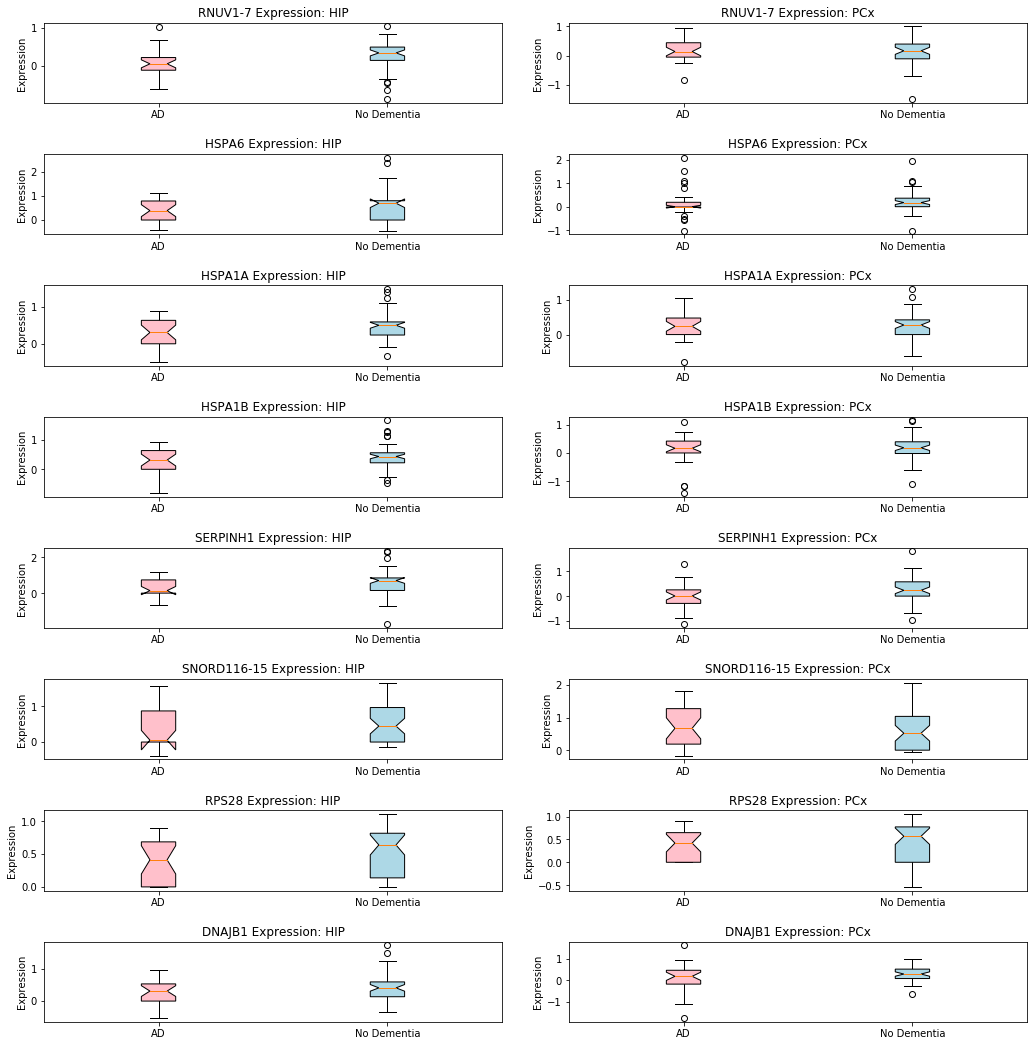

In [159]:
#Create subplots for graphs and set sizing so they don't overlap
fig, ax = plt.subplots(8,2,figsize=(15,15))
fig.tight_layout(pad = 3.0)

#Take the data for the gene, remove NaN, convert to a list, convert to floats, and set it up into a list
RNVU1_7_HIP_data = [convert_to_float(hippo_ad['RNVU1-7'].dropna().tolist()),convert_to_float(hippo_noD['RNVU1-7'].dropna().tolist())]
#Make a boxplot out of the data with patch artist for color and notches to show variance
bplot1 = ax[0,0].boxplot(RNVU1_7_HIP_data, patch_artist=True, notch = True)
#Set up labels for graph
ax[0,0].set_xticklabels(['AD', 'No Dementia'])
ax[0,0].set_ylabel('Expression')
ax[0,0].title.set_text('RNUV1-7 Expression: HIP')

#Repeat as above for each of the different cases.
RNVU1_7_PCx_data = [convert_to_float(pcx_ad['RNVU1-7'].dropna().tolist()),convert_to_float(pcx_noD['RNVU1-7'].dropna().tolist())]
bplot2 = ax[0,1].boxplot(RNVU1_7_PCx_data, patch_artist=True, notch = True)
ax[0,1].set_xticklabels(['AD', 'No Dementia'])
ax[0,1].set_ylabel('Expression')
ax[0,1].title.set_text('RNUV1-7 Expression: PCx')

HSPA6_HIP_data = [convert_to_float(hippo_ad['HSPA6'].dropna().tolist()),convert_to_float(hippo_noD['HSPA6'].dropna().tolist())]
bplot3 = ax[1,0].boxplot(HSPA6_HIP_data, patch_artist=True, notch = True)
ax[1,0].set_xticklabels(['AD', 'No Dementia'])
ax[1,0].set_ylabel('Expression')
ax[1,0].title.set_text('HSPA6 Expression: HIP')

HSPA6_PCx_data = [convert_to_float(pcx_ad['HSPA6'].dropna().tolist()),convert_to_float(pcx_noD['HSPA6'].dropna().tolist())]
bplot4 = ax[1,1].boxplot(HSPA6_PCx_data, patch_artist=True, notch = True)
ax[1,1].set_xticklabels(['AD', 'No Dementia'])
ax[1,1].set_ylabel('Expression')
ax[1,1].title.set_text('HSPA6 Expression: PCx')

HSPA1A_HIP_data = [convert_to_float(hippo_ad['HSPA1A'].dropna().tolist()),convert_to_float(hippo_noD['HSPA1A'].dropna().tolist())]
bplot5 = ax[2,0].boxplot(HSPA1A_HIP_data, patch_artist=True, notch = True)
ax[2,0].set_xticklabels(['AD', 'No Dementia'])
ax[2,0].set_ylabel('Expression')
ax[2,0].title.set_text('HSPA1A Expression: HIP')

HSPA1A_PCx_data = [convert_to_float(pcx_ad['HSPA1A'].dropna().tolist()),convert_to_float(pcx_noD['HSPA1A'].dropna().tolist())]
bplot6 = ax[2,1].boxplot(HSPA1A_PCx_data, patch_artist=True, notch = True)
ax[2,1].set_xticklabels(['AD', 'No Dementia'])
ax[2,1].set_ylabel('Expression')
ax[2,1].title.set_text('HSPA1A Expression: PCx')

HSPA1B_HIP_data = [convert_to_float(hippo_ad['HSPA1B'].dropna().tolist()),convert_to_float(hippo_noD['HSPA1B'].dropna().tolist())]
bplot7 = ax[3,0].boxplot(HSPA1B_HIP_data, patch_artist=True, notch = True)
ax[3,0].set_xticklabels(['AD', 'No Dementia'])
ax[3,0].set_ylabel('Expression')
ax[3,0].title.set_text('HSPA1B Expression: HIP')

HSPA1B_PCx_data = [convert_to_float(pcx_ad['HSPA1B'].dropna().tolist()),convert_to_float(pcx_noD['HSPA1B'].dropna().tolist())]
bplot8 = ax[3,1].boxplot(HSPA1B_PCx_data, patch_artist=True, notch = True)
ax[3,1].set_xticklabels(['AD', 'No Dementia'])
ax[3,1].set_ylabel('Expression')
ax[3,1].title.set_text('HSPA1B Expression: PCx')

SERPINH1_HIP_data = [convert_to_float(hippo_ad['SERPINH1'].dropna().tolist()),convert_to_float(hippo_noD['SERPINH1'].dropna().tolist())]
bplot9 = ax[4,0].boxplot(SERPINH1_HIP_data, patch_artist=True, notch = True)
ax[4,0].set_xticklabels(['AD', 'No Dementia'])
ax[4,0].set_ylabel('Expression')
ax[4,0].title.set_text('SERPINH1 Expression: HIP')

SERPINH1_PCx_data = [convert_to_float(pcx_ad['SERPINH1'].dropna().tolist()),convert_to_float(pcx_noD['SERPINH1'].dropna().tolist())]
bplot10 = ax[4,1].boxplot(SERPINH1_PCx_data, patch_artist=True, notch = True)
ax[4,1].set_xticklabels(['AD', 'No Dementia'])
ax[4,1].set_ylabel('Expression')
ax[4,1].title.set_text('SERPINH1 Expression: PCx')

SNORD116_15_HIP_data = [convert_to_float(hippo_ad['SNORD116-15'].dropna().tolist()),convert_to_float(hippo_noD['SNORD116-15'].dropna().tolist())]
bplot11 = ax[5,0].boxplot(SNORD116_15_HIP_data, patch_artist=True, notch = True)
ax[5,0].set_xticklabels(['AD', 'No Dementia'])
ax[5,0].set_ylabel('Expression')
ax[5,0].title.set_text('SNORD116-15 Expression: HIP')

SNORD116_15_PCx_data = [convert_to_float(pcx_ad['SNORD116-15'].dropna().tolist()),convert_to_float(pcx_noD['SNORD116-15'].dropna().tolist())]
bplot12 = ax[5,1].boxplot(SNORD116_15_PCx_data, patch_artist=True, notch = True)
ax[5,1].set_xticklabels(['AD', 'No Dementia'])
ax[5,1].set_ylabel('Expression')
ax[5,1].title.set_text('SNORD116-15 Expression: PCx')

RPS28_HIP_data = [convert_to_float(hippo_ad['RPS28'].dropna().tolist()),convert_to_float(hippo_noD['RPS28'].dropna().tolist())]
bplot13 = ax[6,0].boxplot(RPS28_HIP_data, patch_artist=True, notch = True)
ax[6,0].set_xticklabels(['AD', 'No Dementia'])
ax[6,0].set_ylabel('Expression')
ax[6,0].title.set_text('RPS28 Expression: HIP')

RPS28_PCx_data = [convert_to_float(pcx_ad['RPS28'].dropna().tolist()),convert_to_float(pcx_noD['RPS28'].dropna().tolist())]
bplot14 = ax[6,1].boxplot(RPS28_PCx_data, patch_artist=True, notch = True)
ax[6,1].set_xticklabels(['AD', 'No Dementia'])
ax[6,1].set_ylabel('Expression')
ax[6,1].title.set_text('RPS28 Expression: PCx')

DNAJB1_HIP_data = [convert_to_float(hippo_ad['DNAJB1'].dropna().tolist()),convert_to_float(hippo_noD['DNAJB1'].dropna().tolist())]
bplot15 = ax[7,0].boxplot(DNAJB1_HIP_data, patch_artist=True, notch = True)
ax[7,0].set_xticklabels(['AD', 'No Dementia'])
ax[7,0].set_ylabel('Expression')
ax[7,0].title.set_text('DNAJB1 Expression: HIP')

DNAJB1_PCx_data = [convert_to_float(pcx_ad['DNAJB1'].dropna().tolist()),convert_to_float(pcx_noD['DNAJB1'].dropna().tolist())]
bplot16 = ax[7,1].boxplot(DNAJB1_PCx_data, patch_artist=True, notch = True)
ax[7,1].set_xticklabels(['AD', 'No Dementia'])
ax[7,1].set_ylabel('Expression')
ax[7,1].title.set_text('DNAJB1 Expression: PCx')

#Method for setting up the color of the boxplots
colors = ['pink', 'lightblue']
for bplot in (bplot1, bplot2, bplot3, bplot4, bplot5, bplot6, bplot7, bplot8, bplot9, bplot10, bplot11, bplot12, bplot13, bplot14, bplot15, bplot16):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

plt.show()

Next, a statistical analysis is done to determine which genes have changes in expression in Alzheimer's patients compared to no dementia.

In [221]:
gene_data_dict = {'RNVU1-7_HIP' : RNVU1_7_HIP_data,
                  'RNVU1-7_PCx' : RNVU1_7_PCx_data,
                  'HSPA6_HIP': HSPA6_HIP_data,
                  'HSPA6_PCx': HSPA6_PCx_data,
                  'HSPA1A_HIP' : HSPA1A_HIP_data,
                  'HSPA1A_PCx' : HSPA1A_PCx_data,
                  'HSPA1B_HIP' : HSPA1B_HIP_data,
                  'HSPA1B_PCx' : HSPA1B_PCx_data,
                  'SERPINH1_HIP': SERPINH1_HIP_data,
                  'SERPIN1H_PCx' : SERPINH1_PCx_data,
                  'SNORD116-15_HIP' : SNORD116_15_HIP_data,
                  'SNORD116-15_PCx' : SNORD116_15_PCx_data,
                  'RPS28_HIP' : RPS28_HIP_data,
                  'RPS28_PCx' : RPS28_PCx_data,
                  'DNAJB1_HIP' : DNAJB1_HIP_data,
                  'DNAJB1_PCx' : DNAJB1_PCx_data }

significant_gene_dict = {}

for item in gene_data_dict:
    stat, pval = stats.ttest_ind(gene_data_dict[item][0], gene_data_dict[item][1])
    if pval < 0.05:
        significant_gene_dict[item] = gene_data_dict[item]

print('The following genes show significantly different expression between AD and no dementia states in their respective areas:')
        
for item in significant_gene_dict: 
    print(item)

The following genes show significantly different expression between AD and no dementia states in their respective areas:
RNVU1-7_HIP
SERPIN1H_PCx
RPS28_HIP


### Protein Pathology Graphing: Disease State Comparison per Area 
First, all data is brought in from data wrangling and graphed with boxplots for a visual representation of mean and variance.

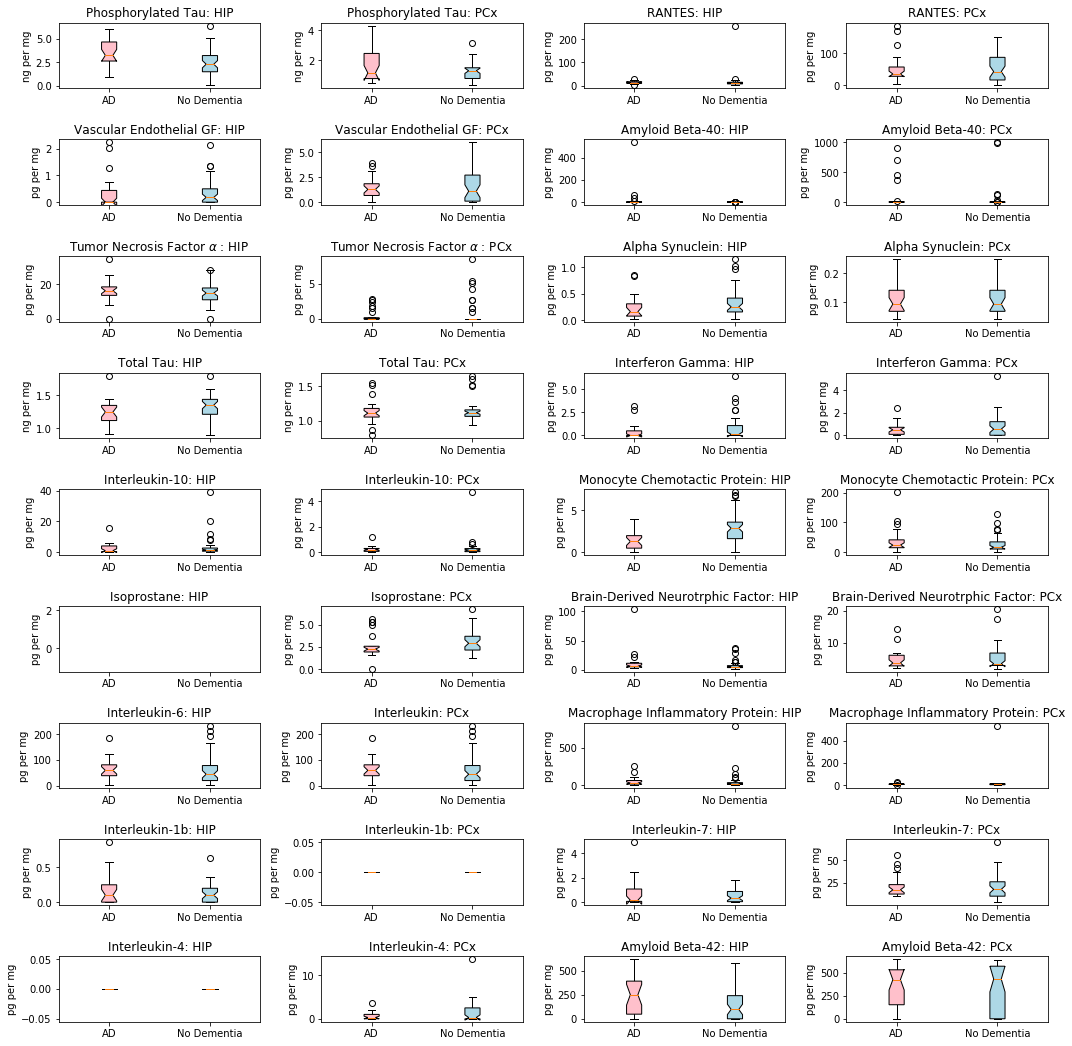

In [297]:
#Create subplots for graphs and set sizing so they don't overlap
fig2, ax2 = plt.subplots(9,4,figsize=(15,15))
fig2.tight_layout(pad = 3.0)


#Take the data for the protein and set it up into a list. Other cleaning has already been completed.
ptau_HIP_data = [ptau_ng_per_mg_hippo_AD,ptau_ng_per_mg_hippo_noD]
ptau_PCx_data = [ptau_ng_per_mg_pcx_AD,ptau_ng_per_mg_pcx_noD]
vegf_HIP_data = [vegf_pg_per_mg_hippo_AD, vegf_pg_per_mg_hippo_noD]
vegf_PCx_data = [vegf_pg_per_mg_pcx_AD, vegf_pg_per_mg_pcx_noD]
tnf_a_HIP_data = [tnf_a_pg_per_mg_hippo_AD, tnf_a_pg_per_mg_hippo_noD]
tnf_a_PCx_data = [tnf_a_pg_per_mg_pcx_AD, tnf_a_pg_per_mg_pcx_noD]
tau_HIP_data = [tau_ng_per_mg_hippo_AD, tau_ng_per_mg_hippo_noD]
tau_PCx_data = [tau_ng_per_mg_pcx_AD, tau_ng_per_mg_pcx_noD]
il_10_HIP_data = [il_10_pg_per_mg_hippo_AD, il_10_pg_per_mg_hippo_noD]
il_10_PCx_data = [il_10_pg_per_mg_pcx_AD, il_10_pg_per_mg_pcx_noD]
isoprostane_HIP_data = [isoprostane_pg_per_mg_hippo_AD, isoprostane_pg_per_mg_hippo_noD]
isoprostane_PCx_data = [isoprostane_pg_per_mg_pcx_AD, isoprostane_pg_per_mg_pcx_noD]
il_6_HIP_data = [il_6_pg_per_mg_hippo_AD, il_6_pg_per_mg_hippo_noD]
il_6_PCx_data = [il_6_pg_per_mg_pcx_AD, il_6_pg_per_mg_pcx_noD]
il_1b_HIP_data = [il_1b_pg_per_mg_hippo_AD, il_1b_pg_per_mg_hippo_noD]
il_1b_PCx_data = [il_1b_pg_per_mg_pcx_AD, il_1b_pg_per_mg_pcx_noD]
il_4_HIP_data = [il_4_pg_per_mg_hippo_AD, il_4_pg_per_mg_hippo_noD]
il_4_PCx_data = [il_4_pg_per_mg_pcx_AD, il_4_pg_per_mg_pcx_noD]
rantes_HIP_data = [rantes_pg_per_mg_hippo_AD, rantes_pg_per_mg_hippo_noD]
rantes_PCx_data = [rantes_pg_per_mg_pcx_AD, rantes_pg_per_mg_pcx_noD]
ab40_HIP_data = [ab40_pg_per_mg_hippo_AD, ab40_pg_per_mg_hippo_noD]
ab40_PCx_data = [ab40_pg_per_mg_pcx_AD, ab40_pg_per_mg_pcx_noD]
a_syn_HIP_data = [a_syn_pg_per_mg_hippo_AD, a_syn_pg_per_mg_hippo_noD]
a_syn_PCx_data = [a_syn_pg_per_mg_pcx_AD, a_syn_pg_per_mg_pcx_AD]
ifn_g_HIP_data = [ifn_g_pg_per_mg_hippo_AD, ifn_g_pg_per_mg_hippo_noD]
ifn_g_PCx_data = [ifn_g_pg_per_mg_pcx_AD, ifn_g_pg_per_mg_pcx_noD]
mcp_1_HIP_data = [mcp_1_pg_per_mg_hippo_AD, mcp_1_pg_per_mg_hippo_noD]
mcp_1_PCx_data = [mcp_1_pg_per_mg_pcx_AD, mcp_1_pg_per_mg_pcx_noD]
bdnf_HIP_data = [bdnf_pg_per_mg_hippo_AD, bdnf_pg_per_mg_hippo_noD]
bdnf_PCx_data = [bdnf_pg_per_mg_pcx_AD, bdnf_pg_per_mg_pcx_noD]
mip_1a_HIP_data = [mip_1a_pg_per_mg_hippo_AD, mip_1a_pg_per_mg_hippo_noD]
mip_1a_PCx_data = [mip_1a_pg_per_mg_pcx_AD, mip_1a_pg_per_mg_pcx_noD]
il_7_HIP_data = [il_7_pg_per_mg_hippo_AD, il_7_pg_per_mg_hippo_noD]
il_7_PCx_data = [il_7_pg_per_mg_pcx_AD, il_7_pg_per_mg_pcx_noD]
ab42_HIP_data = [ab42_pg_per_mg_hippo_AD, ab42_pg_per_mg_hippo_noD]
ab42_PCx_data = [ab42_pg_per_mg_pcx_AD, ab42_pg_per_mg_pcx_noD]

#Make a boxplot out of the data with patch artist for color and notches to show variance
boxplot1 = ax2[0,0].boxplot(ptau_HIP_data, patch_artist=True, notch = True)
#Set up labels for graph
ax2[0,0].set_xticklabels(['AD', 'No Dementia'])
ax2[0,0].set_ylabel('ng per mg')
ax2[0,0].title.set_text('Phosphorylated Tau: HIP')

boxplot2 = ax2[0,1].boxplot(ptau_PCx_data, patch_artist=True, notch = True)
ax2[0,1].set_xticklabels(['AD', 'No Dementia'])
ax2[0,1].set_ylabel('ng per mg')
ax2[0,1].title.set_text('Phosphorylated Tau: PCx')

boxplot3 = ax2[1,0].boxplot(vegf_HIP_data, patch_artist=True, notch = True)
ax2[1,0].set_xticklabels(['AD', 'No Dementia'])
ax2[1,0].set_ylabel('pg per mg')
ax2[1,0].title.set_text('Vascular Endothelial GF: HIP')

boxplot4 = ax2[1,1].boxplot(vegf_PCx_data, patch_artist=True, notch = True)
ax2[1,1].set_xticklabels(['AD', 'No Dementia'])
ax2[1,1].set_ylabel('pg per mg')
ax2[1,1].title.set_text('Vascular Endothelial GF: PCx')

boxplot5 = ax2[2,0].boxplot(tnf_a_HIP_data, patch_artist=True, notch = True)
ax2[2,0].set_xticklabels(['AD', 'No Dementia'])
ax2[2,0].set_ylabel('pg per mg')
ax2[2,0].title.set_text('Tumor Necrosis Factor ' + r'$\alpha$' + ' : HIP')

boxplot6 = ax2[2,1].boxplot(tnf_a_PCx_data, patch_artist=True, notch = True)
ax2[2,1].set_xticklabels(['AD', 'No Dementia'])
ax2[2,1].set_ylabel('pg per mg')
ax2[2,1].title.set_text('Tumor Necrosis Factor ' + r'$\alpha$' + ' : PCx')

boxplot7 = ax2[3,0].boxplot(tau_HIP_data, patch_artist=True, notch = True)
ax2[3,0].set_xticklabels(['AD', 'No Dementia'])
ax2[3,0].set_ylabel('ng per mg')
ax2[3,0].title.set_text('Total Tau: HIP')

boxplot8 = ax2[3,1].boxplot(tau_PCx_data, patch_artist=True, notch = True)
ax2[3,1].set_xticklabels(['AD', 'No Dementia'])
ax2[3,1].set_ylabel('ng per mg')
ax2[3,1].title.set_text('Total Tau: PCx')

boxplot9 = ax2[4,0].boxplot(il_10_HIP_data, patch_artist=True, notch = True)
ax2[4,0].set_xticklabels(['AD', 'No Dementia'])
ax2[4,0].set_ylabel('pg per mg')
ax2[4,0].title.set_text('Interleukin-10: HIP')

boxplot10 = ax2[4,1].boxplot(il_10_PCx_data, patch_artist=True, notch = True)
ax2[4,1].set_xticklabels(['AD', 'No Dementia'])
ax2[4,1].set_ylabel('pg per mg')
ax2[4,1].title.set_text('Interleukin-10: PCx')

boxplot11 = ax2[5,0].boxplot(isoprostane_HIP_data, patch_artist=True, notch = True)
ax2[5,0].set_xticklabels(['AD', 'No Dementia'])
ax2[5,0].set_ylabel('pg per mg')
ax2[5,0].title.set_text('Isoprostane: HIP')

boxplot12 = ax2[5,1].boxplot(isoprostane_PCx_data, patch_artist=True, notch = True)
ax2[5,1].set_xticklabels(['AD', 'No Dementia'])
ax2[5,1].set_ylabel('pg per mg')
ax2[5,1].title.set_text('Isoprostane: PCx')

boxplot13 = ax2[6,0].boxplot(il_6_HIP_data, patch_artist=True, notch = True)
ax2[6,0].set_xticklabels(['AD', 'No Dementia'])
ax2[6,0].set_ylabel('pg per mg')
ax2[6,0].title.set_text('Interleukin-6: HIP')

boxplot14 = ax2[6,1].boxplot(il_6_HIP_data, patch_artist=True, notch = True)
ax2[6,1].set_xticklabels(['AD', 'No Dementia'])
ax2[6,1].set_ylabel('pg per mg')
ax2[6,1].title.set_text('Interleukin: PCx')

boxplot15 = ax2[7,0].boxplot(il_1b_HIP_data, patch_artist=True, notch = True)
ax2[7,0].set_xticklabels(['AD', 'No Dementia'])
ax2[7,0].set_ylabel('pg per mg')
ax2[7,0].title.set_text('Interleukin-1b: HIP')

boxplot16 = ax2[7,1].boxplot(il_1b_PCx_data, patch_artist=True, notch = True)
ax2[7,1].set_xticklabels(['AD', 'No Dementia'])
ax2[7,1].set_ylabel('pg per mg')
ax2[7,1].title.set_text('Interleukin-1b: PCx')

boxplot17 = ax2[8,0].boxplot(il_4_HIP_data, patch_artist=True, notch = True)
ax2[8,0].set_xticklabels(['AD', 'No Dementia'])
ax2[8,0].set_ylabel('pg per mg')
ax2[8,0].title.set_text('Interleukin-4: HIP')

boxplot18 = ax2[8,1].boxplot(il_4_PCx_data, patch_artist=True, notch = True)
ax2[8,1].set_xticklabels(['AD', 'No Dementia'])
ax2[8,1].set_ylabel('pg per mg')
ax2[8,1].title.set_text('Interleukin-4: PCx')

boxplot19 = ax2[0,2].boxplot(rantes_HIP_data, patch_artist=True, notch = True)
ax2[0,2].set_xticklabels(['AD', 'No Dementia'])
ax2[0,2].set_ylabel('pg per mg')
ax2[0,2].title.set_text('RANTES: HIP')

boxplot20 = ax2[0,3].boxplot(rantes_PCx_data, patch_artist=True, notch = True)
ax2[0,3].set_xticklabels(['AD', 'No Dementia'])
ax2[0,3].set_ylabel('pg per mg')
ax2[0,3].title.set_text('RANTES: PCx')

boxplot21 = ax2[1,2].boxplot(ab40_HIP_data, patch_artist=True, notch = True)
ax2[1,2].set_xticklabels(['AD', 'No Dementia'])
ax2[1,2].set_ylabel('pg per mg')
ax2[1,2].title.set_text('Amyloid Beta-40: HIP')

boxplot22 = ax2[1,3].boxplot(ab40_PCx_data, patch_artist=True, notch = True)
ax2[1,3].set_xticklabels(['AD', 'No Dementia'])
ax2[1,3].set_ylabel('pg per mg')
ax2[1,3].title.set_text('Amyloid Beta-40: PCx')

boxplot23 = ax2[2,2].boxplot(a_syn_HIP_data, patch_artist=True, notch = True)
ax2[2,2].set_xticklabels(['AD', 'No Dementia'])
ax2[2,2].set_ylabel('pg per mg')
ax2[2,2].title.set_text('Alpha Synuclein: HIP')

boxplot24 = ax2[2,3].boxplot(a_syn_PCx_data, patch_artist=True, notch = True)
ax2[2,3].set_xticklabels(['AD', 'No Dementia'])
ax2[2,3].set_ylabel('pg per mg')
ax2[2,3].title.set_text('Alpha Synuclein: PCx')

boxplot25 = ax2[3,2].boxplot(ifn_g_HIP_data, patch_artist=True, notch = True)
ax2[3,2].set_xticklabels(['AD', 'No Dementia'])
ax2[3,2].set_ylabel('pg per mg')
ax2[3,2].title.set_text('Interferon Gamma: HIP')

boxplot26 = ax2[3,3].boxplot(ifn_g_PCx_data, patch_artist=True, notch = True)
ax2[3,3].set_xticklabels(['AD', 'No Dementia'])
ax2[3,3].set_ylabel('pg per mg')
ax2[3,3].title.set_text('Interferon Gamma: PCx')

boxplot27 = ax2[4,2].boxplot(mcp_1_HIP_data, patch_artist=True, notch = True)
ax2[4,2].set_xticklabels(['AD', 'No Dementia'])
ax2[4,2].set_ylabel('pg per mg')
ax2[4,2].title.set_text('Monocyte Chemotactic Protein: HIP')

boxplot28 = ax2[4,3].boxplot(mcp_1_PCx_data, patch_artist=True, notch = True)
ax2[4,3].set_xticklabels(['AD', 'No Dementia'])
ax2[4,3].set_ylabel('pg per mg')
ax2[4,3].title.set_text('Monocyte Chemotactic Protein: PCx')

boxplot29 = ax2[5,2].boxplot(bdnf_HIP_data, patch_artist=True, notch = True)
ax2[5,2].set_xticklabels(['AD', 'No Dementia'])
ax2[5,2].set_ylabel('pg per mg')
ax2[5,2].title.set_text('Brain-Derived Neurotrphic Factor: HIP')

boxplot30 = ax2[5,3].boxplot(bdnf_PCx_data, patch_artist=True, notch = True)
ax2[5,3].set_xticklabels(['AD', 'No Dementia'])
ax2[5,3].set_ylabel('pg per mg')
ax2[5,3].title.set_text('Brain-Derived Neurotrphic Factor: PCx')

boxplot31 = ax2[6,2].boxplot(mip_1a_HIP_data, patch_artist=True, notch = True)
ax2[6,2].set_xticklabels(['AD', 'No Dementia'])
ax2[6,2].set_ylabel('pg per mg')
ax2[6,2].title.set_text('Macrophage Inflammatory Protein: HIP')

boxplot32 = ax2[6,3].boxplot(mip_1a_PCx_data, patch_artist=True, notch = True)
ax2[6,3].set_xticklabels(['AD', 'No Dementia'])
ax2[6,3].set_ylabel('pg per mg')
ax2[6,3].title.set_text('Macrophage Inflammatory Protein: PCx')

boxplot33 = ax2[7,2].boxplot(il_7_HIP_data, patch_artist=True, notch = True)
ax2[7,2].set_xticklabels(['AD', 'No Dementia'])
ax2[7,2].set_ylabel('pg per mg')
ax2[7,2].title.set_text('Interleukin-7: HIP')

boxplot34 = ax2[7,3].boxplot(il_7_PCx_data, patch_artist=True, notch = True)
ax2[7,3].set_xticklabels(['AD', 'No Dementia'])
ax2[7,3].set_ylabel('pg per mg')
ax2[7,3].title.set_text('Interleukin-7: PCx')

boxplot35 = ax2[8,2].boxplot(ab42_HIP_data, patch_artist=True, notch = True)
ax2[8,2].set_xticklabels(['AD', 'No Dementia'])
ax2[8,2].set_ylabel('pg per mg')
ax2[8,2].title.set_text('Amyloid Beta-42: HIP')

boxplot36 = ax2[8,3].boxplot(ab42_PCx_data, patch_artist=True, notch = True)
ax2[8,3].set_xticklabels(['AD', 'No Dementia'])
ax2[8,3].set_ylabel('pg per mg')
ax2[8,3].title.set_text('Amyloid Beta-42: PCx')
                                                                              
#Method for setting up the color of the boxplots
colors = ['pink', 'lightblue']
for bplot in (boxplot1, boxplot2, boxplot3, boxplot4, boxplot5, boxplot6, boxplot7, boxplot8, boxplot9, boxplot10, boxplot11, boxplot12, boxplot13, boxplot14, boxplot15, boxplot16, boxplot17, boxplot18, boxplot19, boxplot20, boxplot21, boxplot22, boxplot23, boxplot24, boxplot25, boxplot26, boxplot27, boxplot28, boxplot29, boxplot30, boxplot31, boxplot32, boxplot33, boxplot34, boxplot35, boxplot36):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

plt.show()

Note: Data is completely absent for isoprostane in the hippocampus.

Note: For Interleukin-1b, all values recorded for PCx were zero (i.e. none was present in the parietal whatsoever).

Note: For Interleukin-4, all values recorded for HIP were zero (i.e. none was present in the hippocampus whatsoever).

Next, a statistical analysis is done to determine which proteins have changes in accumulation in Alzheimer's patients compared to no dementia.

In [299]:
protein_data_dict = {'Phosphorylated Tau, HIP' : ptau_HIP_data,
                     'Phosphorylated Tau, PCx' : ptau_PCx_data,
                     'Vascular Endothelial GF, HIP' : vegf_HIP_data,
                     'Vascular Endothelial GF, PCx' : vegf_PCx_data,
                     'Tumor Necrosis Factor Alpha, HIP' : tnf_a_HIP_data,
                     'Tumor Necrosis Factor Alpha, PCx' : tnf_a_PCx_data,
                     'Total Tau, HIP' : tau_HIP_data,
                     'Total Tau, PCx' : tau_PCx_data,
                     'Interleukin-10, HIP' : il_10_HIP_data,
                     'Interleukin-10, PCx' : il_10_PCx_data,
                     'Isoprostane, HIP' : isoprostane_HIP_data,
                     'Isoprostane, PCx' : isoprostane_PCx_data,
                     'Interleukin-6, HIP' : il_6_HIP_data,
                     'Interleukin-6, PCx' : il_6_PCx_data,
                     'Interleukin-1b, HIP' : il_1b_HIP_data,
                     'Interleukin-1b, PCx' : il_1b_PCx_data,
                     'Interleukin-4, HIP' : il_4_HIP_data,
                     'Interleukin-4, PCx' : il_4_PCx_data,
                     'RANTES, HIP' : rantes_HIP_data,
                     'RANTES, PCx' : rantes_PCx_data,
                     'Amyloid Beta-40, HIP' : ab40_HIP_data,
                     'Amyloid Beta-40, PCx' : ab40_PCx_data,
                     'Alpha Synuclein, HIP' : a_syn_HIP_data,
                     'Alpha Synuclein, PCx' : a_syn_PCx_data,
                     'Interferon Gamma, HIP' : ifn_g_HIP_data,
                     'Interferon Gamma, PCx' : ifn_g_PCx_data,
                     'Monocyte Chemotactic Protein, HIP' : mcp_1_HIP_data,
                     'Monocyte Chemotactic Protein, PCx' : mcp_1_PCx_data,
                     'Brain-Derived Neurotrophic Factor, HIP' : bdnf_HIP_data,
                     'Brain-Derived Neurotropic Factor, PCx' : bdnf_PCx_data,
                     'Macrophage Inflammatory Protein, HIP' : mip_1a_HIP_data,
                     'Macrophage Inflammatory Protein, PCx' : mip_1a_PCx_data,
                     'Interleukin-7, HIP' : il_7_HIP_data,
                     'Interleukin-7, PCx' : il_7_PCx_data,
                     'Amyloid Beta-42, HIP' : ab42_HIP_data,
                     'Amyloid Beta-42, PCx' : ab42_PCx_data
}

significant_protein_dict = {}

for item in protein_data_dict:
    stat, pval = stats.ttest_ind(protein_data_dict[item][0], protein_data_dict[item][1])
    if pval < 0.05:
        significant_protein_dict[item] = protein_data_dict[item]

print('The following proteins show significantly different accumulation between AD and no dementia states in their respective areas:')
        
for item in significant_protein_dict: 
    print(item)

The following proteins show significantly different accumulation between AD and no dementia states in their respective areas:
Phosphorylated Tau, HIP
Monocyte Chemotactic Protein, HIP
Amyloid Beta-42, HIP


### Correlation between gene expression and protein accumulation in the hippocampus
Given that no proteins have significant accumulation in the parietal cortex, we concluded that the parietal cortex can now be left out of the following analyses for correlation.

Now, we have determined the genes and proteins in the hippocampus that have differences in expression or differences in accumulation, respectively. The next step is to see if there is a correlation between the gene expression and protein accumulation for any combination of genes and proteins.

Due to differences in the amount of values that were removed from the datasets, the following function is used to make them equal length by adding the mean back to the list until they are of equal length. The data is relatively normal prior to the changes, so it does not significantly skew the data.

In [287]:
def make_equal_length(list1, list2):
    if len(list1) > len(list2):
        list2.append(mean(list2))
        make_equal_length(list1, list2)
    elif len(list1) < len(list2):
        list1.append(mean(list2))
        make_equal_length(list1, list2)
    else:
        return (list1, list2)

In [288]:
#Pairing of the data for each gene-protein pair:
RNVU1_7_ptau_AD = make_equal_length(RNVU1_7_HIP_data[0], ptau_HIP_data[0])
RNVU1_7_mcp_1_AD = make_equal_length(RNVU1_7_HIP_data[0], mcp_1_HIP_data[0])
RNVU1_7_ab42_AD = make_equal_length(RNVU1_7_HIP_data[0], ab42_HIP_data[0])
RPS28_ptau_AD = make_equal_length(RPS28_HIP_data[0], ptau_HIP_data[0])
RPS28_mcp_1_AD = make_equal_length(RPS28_HIP_data[0], mcp_1_HIP_data[0])
RPS28_ab42_AD = make_equal_length(RPS28_HIP_data[0], ab42_HIP_data[0])

RNVU1_7_ptau_noD = make_equal_length(RNVU1_7_HIP_data[1], ptau_HIP_data[1])
RNVU1_7_mcp_1_noD = make_equal_length(RNVU1_7_HIP_data[1], mcp_1_HIP_data[1])
RNVU1_7_ab42_noD = make_equal_length(RNVU1_7_HIP_data[1], ab42_HIP_data[1])
RPS28_ptau_noD = make_equal_length(RPS28_HIP_data[1], ptau_HIP_data[1])
RPS28_mcp_1_noD = make_equal_length(RPS28_HIP_data[1], mcp_1_HIP_data[1])
RPS28_ab42_noD = make_equal_length(RPS28_HIP_data[1], ab42_HIP_data[1])

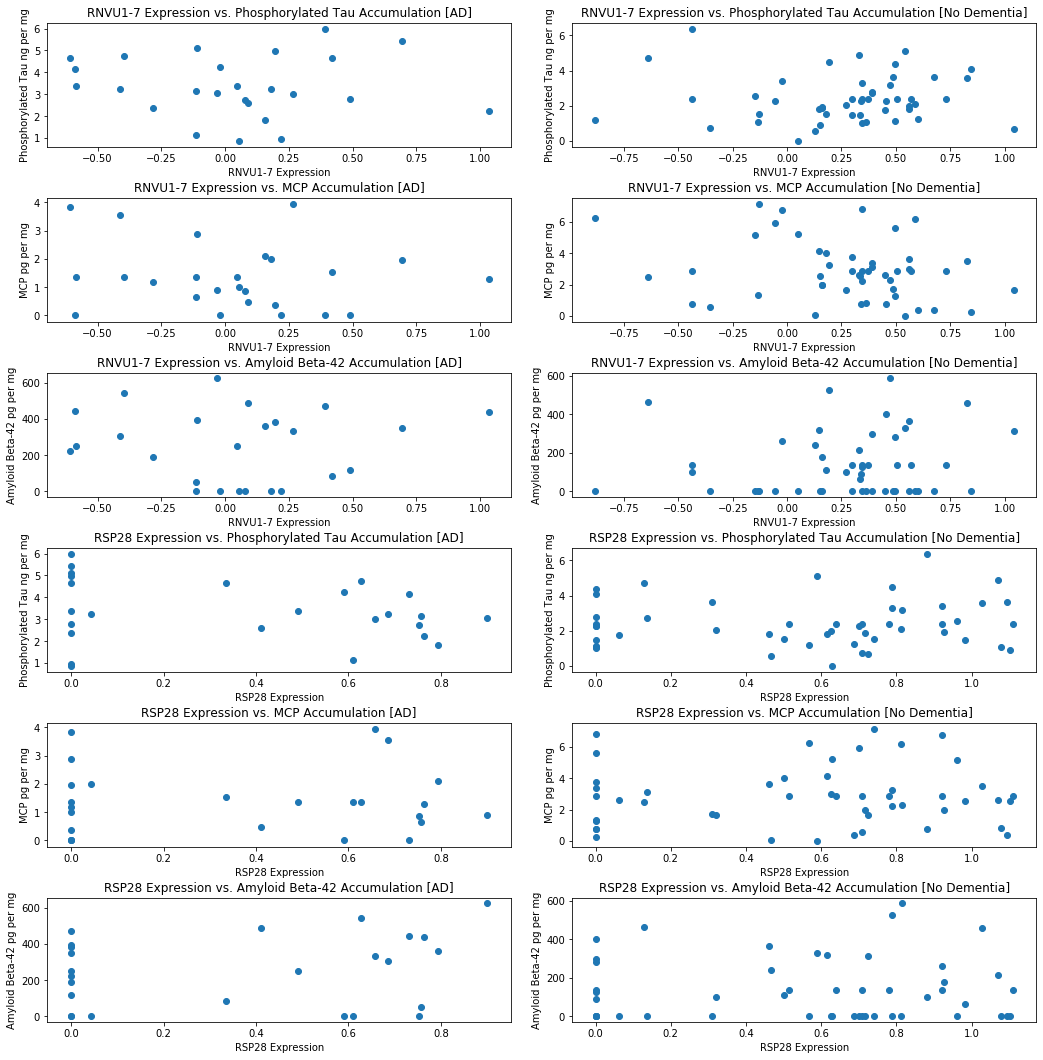

In [289]:
fig3, ax3 = plt.subplots(6,2,figsize=(15,15))
fig3.tight_layout(pad = 3.0)

sp1 = ax3[0,0].scatter(RNVU1_7_ptau_AD[0], RNVU1_7_ptau_AD[1])
ax3[0,0].set_xlabel('RNVU1-7 Expression')
ax3[0,0].set_ylabel('Phosphorylated Tau ng per mg')
ax3[0,0].title.set_text('RNVU1-7 Expression vs. Phosphorylated Tau Accumulation [AD]')

sp2 = ax3[0,1].scatter(RNVU1_7_ptau_noD[0], RNVU1_7_ptau_noD[1])
ax3[0,1].set_xlabel('RNVU1-7 Expression')
ax3[0,1].set_ylabel('Phosphorylated Tau ng per mg')
ax3[0,1].title.set_text('RNVU1-7 Expression vs. Phosphorylated Tau Accumulation [No Dementia]')

sp3 = ax3[1,0].scatter(RNVU1_7_mcp_1_AD[0], RNVU1_7_mcp_1_AD[1])
ax3[1,0].set_xlabel('RNVU1-7 Expression')
ax3[1,0].set_ylabel('MCP pg per mg')
ax3[1,0].title.set_text('RNVU1-7 Expression vs. MCP Accumulation [AD]')

sp4 = ax3[1,1].scatter(RNVU1_7_mcp_1_noD[0], RNVU1_7_mcp_1_noD[1])
ax3[1,1].set_xlabel('RNVU1-7 Expression')
ax3[1,1].set_ylabel('MCP pg per mg')
ax3[1,1].title.set_text('RNVU1-7 Expression vs. MCP Accumulation [No Dementia]')

sp5 = ax3[2,0].scatter(RNVU1_7_ab42_AD[0], RNVU1_7_ab42_AD[1])
ax3[2,0].set_xlabel('RNVU1-7 Expression')
ax3[2,0].set_ylabel('Amyloid Beta-42 pg per mg')
ax3[2,0].title.set_text('RNVU1-7 Expression vs. Amyloid Beta-42 Accumulation [AD]')

sp6 = ax3[2,1].scatter(RNVU1_7_ab42_noD[0], RNVU1_7_ab42_noD[1])
ax3[2,1].set_xlabel('RNVU1-7 Expression')
ax3[2,1].set_ylabel('Amyloid Beta-42 pg per mg')
ax3[2,1].title.set_text('RNVU1-7 Expression vs. Amyloid Beta-42 Accumulation [No Dementia]')

sp7 = ax3[3,0].scatter(RPS28_ptau_AD[0], RPS28_ptau_AD[1])
ax3[3,0].set_xlabel('RSP28 Expression')
ax3[3,0].set_ylabel('Phosphorylated Tau ng per mg')
ax3[3,0].title.set_text('RSP28 Expression vs. Phosphorylated Tau Accumulation [AD]')

sp8 = ax3[3,1].scatter(RPS28_ptau_noD[0], RPS28_ptau_noD[1])
ax3[3,1].set_xlabel('RSP28 Expression')
ax3[3,1].set_ylabel('Phosphorylated Tau ng per mg')
ax3[3,1].title.set_text('RSP28 Expression vs. Phosphorylated Tau Accumulation [No Dementia]')

sp9 = ax3[4,0].scatter(RPS28_mcp_1_AD[0], RPS28_mcp_1_AD[1])
ax3[4,0].set_xlabel('RSP28 Expression')
ax3[4,0].set_ylabel('MCP pg per mg')
ax3[4,0].title.set_text('RSP28 Expression vs. MCP Accumulation [AD]')

sp10 = ax3[4,1].scatter(RPS28_mcp_1_noD[0], RPS28_mcp_1_noD[1])
ax3[4,1].set_xlabel('RSP28 Expression')
ax3[4,1].set_ylabel('MCP pg per mg')
ax3[4,1].title.set_text('RSP28 Expression vs. MCP Accumulation [No Dementia]')

sp11 = ax3[5,0].scatter(RPS28_ab42_AD[0], RPS28_ab42_AD[1])
ax3[5,0].set_xlabel('RSP28 Expression')
ax3[5,0].set_ylabel('Amyloid Beta-42 pg per mg')
ax3[5,0].title.set_text('RSP28 Expression vs. Amyloid Beta-42 Accumulation [AD]')

sp12 = ax3[5,1].scatter(RPS28_ab42_noD[0], RPS28_ab42_noD[1])
ax3[5,1].set_xlabel('RSP28 Expression')
ax3[5,1].set_ylabel('Amyloid Beta-42 pg per mg')
ax3[5,1].title.set_text('RSP28 Expression vs. Amyloid Beta-42 Accumulation [No Dementia]')


plt.show()

Now, a set of Pearson correlation tests were used to judge if there is significant linear correlation between the gene expression and protein accumulation for each case:

In [308]:
correlation_dict = {'RNVU1-7 and Phosphorylated Tau, AD' : RNVU1_7_ptau_AD,
                    'RNVU1-7 and Monocyte Chemotactic Protein, AD' : RNVU1_7_mcp_1_AD,
                    'RNVU1-7 and Amyloid Beta-42, AD' : RNVU1_7_ab42_AD,
                    'RPS28 and Phosphorylated Tau, AD' : RPS28_ptau_AD,
                    'RPS28 and Monocyte Chemotactic Protein, AD': RPS28_mcp_1_AD,
                    'RPS28 and Amyloid Beta-42, AD' : RPS28_ab42_AD,
                    'RNVU1-7 and Phosphorylated Tau, No Dementia' : RNVU1_7_ptau_noD,
                    'RNVU1-7 and Monocyte Chemotactic Protein, No Dementia' : RNVU1_7_mcp_1_noD,
                    'RNVU1-7 and Amyloid Beta-42, No Dementia' : RNVU1_7_ab42_noD,
                    'RPS28 and Phosphorylated Tau, No Dementia' : RPS28_ptau_noD,
                    'RPS28 and Monocyte Chemotactic Protein, No Dementia' : RPS28_mcp_1_noD,
                    'RPS28 and Amyloid Beta-42' : RPS28_ab42_noD    
}

significant_correlation_dict = {}

for item in correlation_dict:
    rval, pval = stats.pearsonr(correlation_dict[item][0], correlation_dict[item][1])
    print(item + ' -- r value = ' + str(rval) +  ' and p value = ' + str(pval))
    if pval < 0.05:
        significant_correlation_dict[item] = correlation_dict[item]
        
if len(significant_correlation_dict) == 0:
    print()
    print('There are no significant correlations between protein accumulation and gene expression for the genes and proteins selected.')
    
else:
    print()
    print('The correlations between the following proteins and genes are significant: ')
    for item in significant_correlation_dict:
        print(item)

RNVU1-7 and Phosphorylated Tau, AD -- r value = -0.048890487610686824 and p value = 0.8164791141558453
RNVU1-7 and Monocyte Chemotactic Protein, AD -- r value = -0.18753029470864258 and p value = 0.3693732492511578
RNVU1-7 and Amyloid Beta-42, AD -- r value = -0.013986979879634931 and p value = 0.9470931977281473
RPS28 and Phosphorylated Tau, AD -- r value = -0.21396508376700835 and p value = 0.3044157686836089
RPS28 and Monocyte Chemotactic Protein, AD -- r value = 0.031536938996360175 and p value = 0.881041830292598
RPS28 and Amyloid Beta-42, AD -- r value = 0.21961999264994628 and p value = 0.29150387625704155
RNVU1-7 and Phosphorylated Tau, No Dementia -- r value = 0.015168891721292476 and p value = 0.9176082103995771
RNVU1-7 and Monocyte Chemotactic Protein, No Dementia -- r value = -0.259101596923207 and p value = 0.07222005777980926
RNVU1-7 and Amyloid Beta-42, No Dementia -- r value = 0.1261183731037453 and p value = 0.38786625407769904
RPS28 and Phosphorylated Tau, No Dementia

# Conclusion

From this project, we can conclude that in the hippocampus, there is significant differences in gene expression and protein accumulation for Alzheimer's patients when compared to those with no dementia. In terms of genes, RNVU1-7 and RPS28 were found to have changes in their regulation in the hippocampi of AD patients. There was also shown to be significant changes in the accumulation of phosphorylated tau, monocyte chemotactic protein, and amyloid beta-42 proteins in the hippocampus. The drastic changes in this region confirm the high level of Alzheimer's effects suggested by the Braak staging. However, there is no direct correlation between the significant changes in gene expression and the changes in protein accumulation. This is likely due to the fact that these genes do not directly impact protein expression or regulation. Their changes in regulation likely have different effects in Alzheimer's pathogenesis beyond protein accumulation. 

In addition, we found that SERPIN1H was differently regulated in the parietal cortex of AD patients compared to those without dementia. However, there were no significant changes in protein accumulation, suggesting that the parietal cortex is not heavily affected by protein accumulation. This includes the lack of the hallmark proteins phosphorylated tau and amyloid beta-42 that are typically involved in diagnosis of AD. Overall, these data match the Braak staging which suggested that compared to the hippocampus, the parietal is relatively untouched by the negative effects of AD. 

# Discussion

With this experiment, the fact that we did not find any correlation in the data is at first disappointing. However, it is ultimately worthwhile to find that there is no connection between these differentially regulated genes and changes in protein accumulation. This means that these genes are likely not therapeutic targets for Alzheimer's disease or have limited impact in terms of protein changes, so future research can focus on other things. 

Within the data itself, there were a number of issues that altered our ability to use it. There were significant limitations on the amount of data given that it is human data, and future experiments in the style of our experiment could be completed as more data is generated over time. Furthermore, the data that we had access to was relatively clean and usable. However, there were a large amount of empty or NaN values that had to be removed from the data that limited access to more usable information. There was also a small subset of the data that had issues, including multiple decimal points, that had to be removed to preserve the integrity of the other data. Additionally, to perform correlations and make scatter plots, the lists that contained the data had to be modified by adding more instances of the mean to the dataset so that their lengths would match. Overall, a careful use of the data that revolved around keeping patients that had both changed gene expression and changed protein accumulation would be the best and most reliable way of getting clear and usable data. This type of data will likely become increasingly available over time and future experiments should take advantage of it. 

One source of bias that was present in the data was that we selected our genes of interest by their positive fold change. Arbitrarily, we chose any gene that had fold change above 1.5. Given larger range in future experiments, an analysis could be performed that took advantage of all of the gene library rather than a select group of 8 genes. This could lead to more potential correlations that were missed in this data. It would also be prudent for future research to target specific genes of interest based on biological observations in the lab.

This experiment took a direct focus on comparing "Alzheimer's Disease Type" to "No Dementia" according to the DSM IV Clinical Diagnosis. Future experiments could look into other ways of diagnosing Alzheimer's or they could focus on different kinds of dementia, mild cognitive impairment, or traumatic brain injury, all of which are included in the current data set.

One conclusion that caught us off guard was the significant change in accumulation of monocyte chemotactic protein 1 (MCP1). This protein was grouped with phosphorylated tau and amyloid beta-42, both of which serve as hallmarks of the disease. Research projects in the future could focus their efforts on understanding why MCP1 is so highly expressed and what its function is in the disease. This protein typically is involved in the immune response, so an interesting line of questioning would be why there is a high concentration of this protein in AD pathogenesis.

## Reflection

Overall, this project was really exciting for our group, but we also faced difficulties in the beginning. Our original idea was made impossible by the lack of current data available from the Human Connectome Project, but we pivoted successfully and found a way of pursuing the topic that all of us enjoyed. The data regarding this topic is very sparse in terms of available, open source data, but the Allen Database luckily had a reliable source of Alzheimer's-related database. Once we came up with our idea, things went relatively smoothly throughout, but we noticed an inherent disconnect due to the online format of the class. Often, we met after writing our pieces of the code, leading to redundancies or issues that needed to be resolved. Ultimately, this only slightly inhibited our ability to get the project to the level we wanted. I think our approach also suffered periodically because there was a lot of hard-coded values and more things could have been done programatically.